In [2]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, balanced_accuracy_score

### Load Dataset

In [4]:
MNIST = pd.read_csv("Numbers.txt", delim_whitespace=True)

C:\Users\Carl Gillmert\AppData\Local\Temp\ipykernel_8124\2416769158.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  MNIST = pd.read_csv("Numbers.txt", delim_whitespace=True)


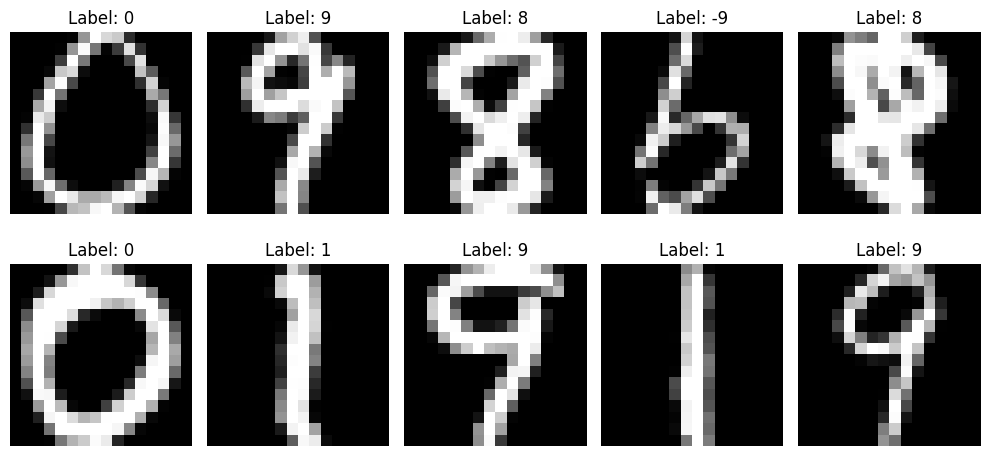

In [5]:
# Separate the label (first column) and the image pixels (remaining columns)
labels = MNIST.iloc[:, 0].astype(int).values
images = MNIST.iloc[:, 1:].values

img_dim = int(np.sqrt(images.shape[1]))
# Plot some images (for example, the first 10)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    # Reshape the flat image into 16x16
    img = images[i].reshape(img_dim, img_dim)
    # Show the image. Using cmap='gray' for better visualization.
    ax.imshow(img, cmap='gray', interpolation='nearest')
    ax.set_title(f"Label: {labels[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [6]:
catdog = pd.read_csv('catdogdata.txt', sep=' ').values

In [7]:
labels_cd = np.zeros(catdog.shape[0])
labels_cd[99:] = 1  # 0 for cats, 1 for dogs

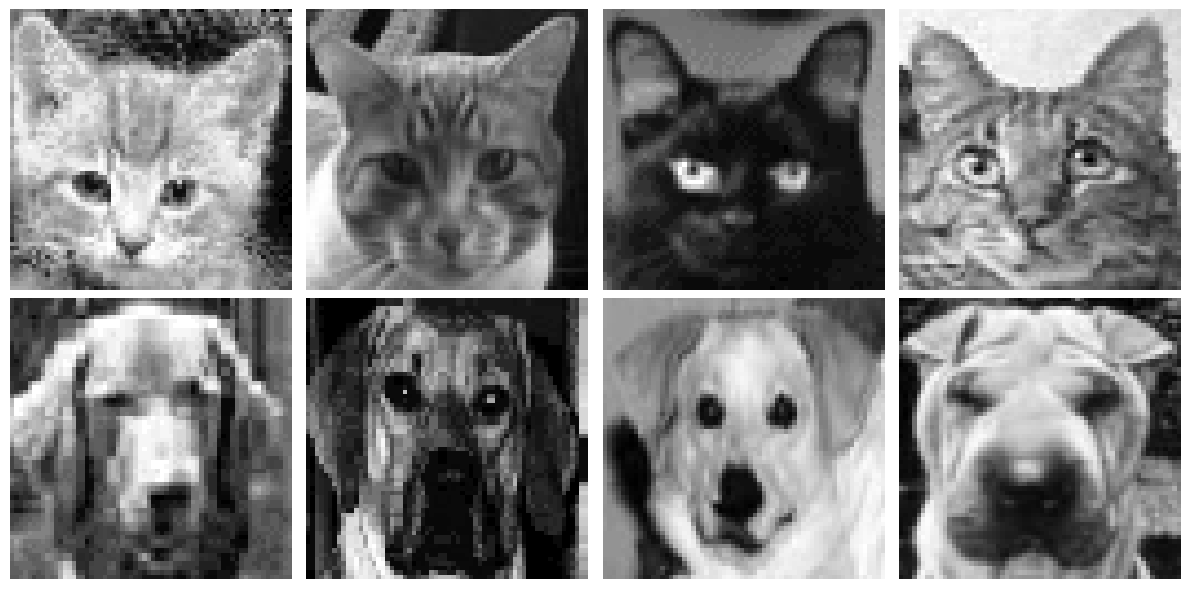

In [8]:
def rotateM(img):
   return np.rot90(img, k=-1)

np.random.seed(0)

ssc = np.random.choice(np.where(labels_cd == 0)[0], 4, replace=False)
ssd = np.random.choice(np.where(labels_cd == 1)[0], 4, replace=False)

fig, axs = plt.subplots(2, 4, figsize=(12, 6))

for i , idx in enumerate([ssc[0], ssc[1], ssc[2], ssc[3], ssd[0], ssd[1], ssd[2], ssd[3]]):
   img = catdog[idx].reshape(64, 64)
   img = rotateM(img)
   ax = axs[i // 4, i % 4]
   ax.imshow(img, cmap='gray')
   ax.axis('off') 

plt.tight_layout()
plt.show()

In [9]:
labels_cd.shape

(198,)

### Part 1

#### MNIST: F-test and Lasso


==================== RUN 1/5 ====================

=== ANOVA Feature Selection ===
k=100: CV Balanced Accuracy = 0.8987
k=120: CV Balanced Accuracy = 0.9001
k=140: CV Balanced Accuracy = 0.9090
k=160: CV Balanced Accuracy = 0.9105
k=180: CV Balanced Accuracy = 0.9123
k=200: CV Balanced Accuracy = 0.9112
k=220: CV Balanced Accuracy = 0.9100
k=240: CV Balanced Accuracy = 0.9122
Best k is: 180


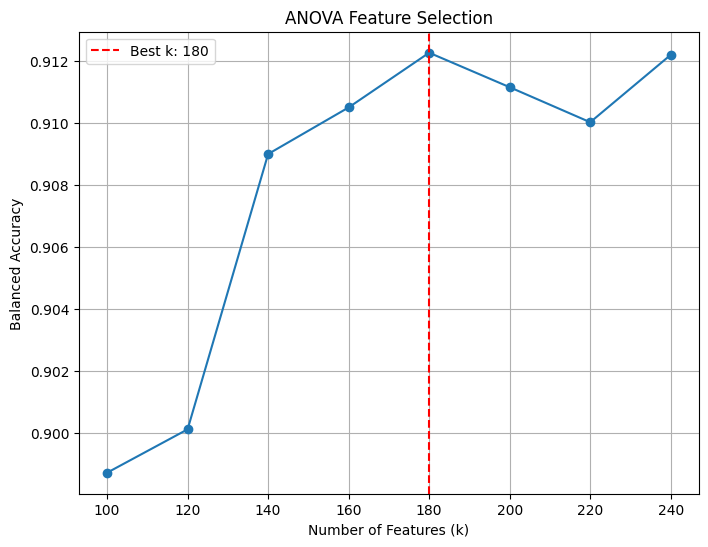


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.9050
  Balanced Accuracy = 0.8962
SVM:
  Accuracy = 0.8550
  Balanced Accuracy = 0.8398
Random Forest:
  Accuracy = 0.9025
  Balanced Accuracy = 0.8948

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.9175
  Balanced Accuracy = 0.9091
SVM:
  Accuracy = 0.8875
  Balanced Accuracy = 0.8766
Random Forest:
  Accuracy = 0.9175
  Balanced Accuracy = 0.9083

==================== RUN 2/5 ====================

=== ANOVA Feature Selection ===
k=100: CV Balanced Accuracy = 0.8941
k=120: CV Balanced Accuracy = 0.8971
k=140: CV Balanced Accuracy = 0.9026
k=160: CV Balanced Accuracy = 0.9064
k=180: CV Balanced Accuracy = 0.9064
k=200: CV Balanced Accuracy = 0.9103
k=220: CV Balanced Accuracy = 0.9101
k=240: CV Balanced Accuracy = 0.9102
Best k is: 200


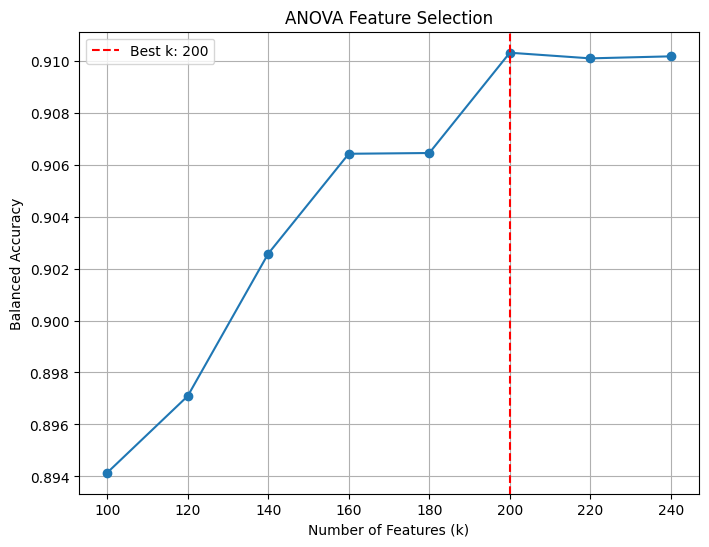


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.9150
  Balanced Accuracy = 0.9079
SVM:
  Accuracy = 0.9050
  Balanced Accuracy = 0.8953
Random Forest:
  Accuracy = 0.9350
  Balanced Accuracy = 0.9270

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.9200
  Balanced Accuracy = 0.9142
SVM:
  Accuracy = 0.9150
  Balanced Accuracy = 0.9059
Random Forest:
  Accuracy = 0.9350
  Balanced Accuracy = 0.9296

==================== RUN 3/5 ====================

=== ANOVA Feature Selection ===
k=100: CV Balanced Accuracy = 0.8901
k=120: CV Balanced Accuracy = 0.8995
k=140: CV Balanced Accuracy = 0.8978
k=160: CV Balanced Accuracy = 0.9015
k=180: CV Balanced Accuracy = 0.9028
k=200: CV Balanced Accuracy = 0.9024
k=220: CV Balanced Accuracy = 0.9031
k=240: CV Balanced Accuracy = 0.9057
Best k is: 240


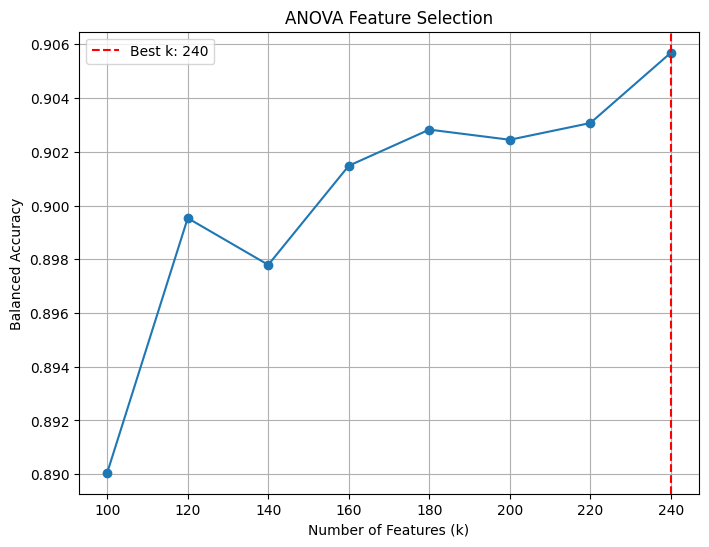


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.9125
  Balanced Accuracy = 0.9028
SVM:
  Accuracy = 0.8850
  Balanced Accuracy = 0.8718
Random Forest:
  Accuracy = 0.9300
  Balanced Accuracy = 0.9208

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.9175
  Balanced Accuracy = 0.9075
SVM:
  Accuracy = 0.8850
  Balanced Accuracy = 0.8711
Random Forest:
  Accuracy = 0.9300
  Balanced Accuracy = 0.9231

==================== RUN 4/5 ====================

=== ANOVA Feature Selection ===
k=100: CV Balanced Accuracy = 0.8911
k=120: CV Balanced Accuracy = 0.8964
k=140: CV Balanced Accuracy = 0.9056
k=160: CV Balanced Accuracy = 0.9060
k=180: CV Balanced Accuracy = 0.9046
k=200: CV Balanced Accuracy = 0.9071
k=220: CV Balanced Accuracy = 0.9081
k=240: CV Balanced Accuracy = 0.9091
Best k is: 240


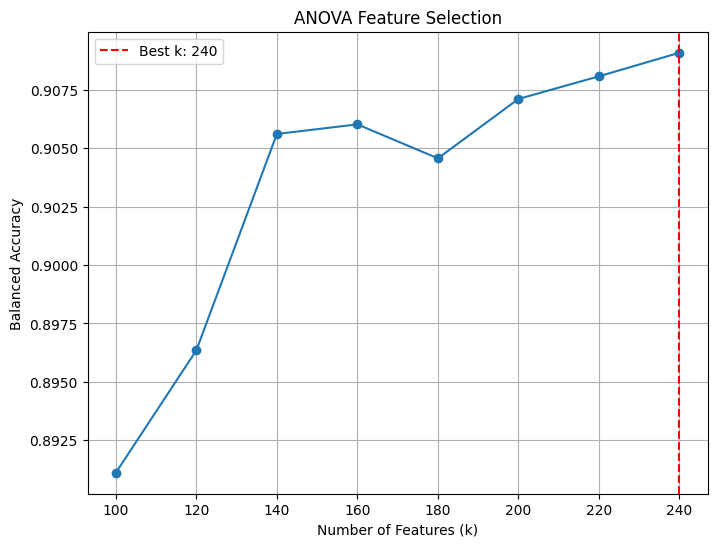


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.9250
  Balanced Accuracy = 0.9138
SVM:
  Accuracy = 0.8975
  Balanced Accuracy = 0.8842
Random Forest:
  Accuracy = 0.9225
  Balanced Accuracy = 0.9105

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.9200
  Balanced Accuracy = 0.9085
SVM:
  Accuracy = 0.9000
  Balanced Accuracy = 0.8882
Random Forest:
  Accuracy = 0.9300
  Balanced Accuracy = 0.9202

==================== RUN 5/5 ====================

=== ANOVA Feature Selection ===
k=100: CV Balanced Accuracy = 0.8967
k=120: CV Balanced Accuracy = 0.8950
k=140: CV Balanced Accuracy = 0.9012
k=160: CV Balanced Accuracy = 0.9057
k=180: CV Balanced Accuracy = 0.9038
k=200: CV Balanced Accuracy = 0.9055
k=220: CV Balanced Accuracy = 0.9089
k=240: CV Balanced Accuracy = 0.9104
Best k is: 240


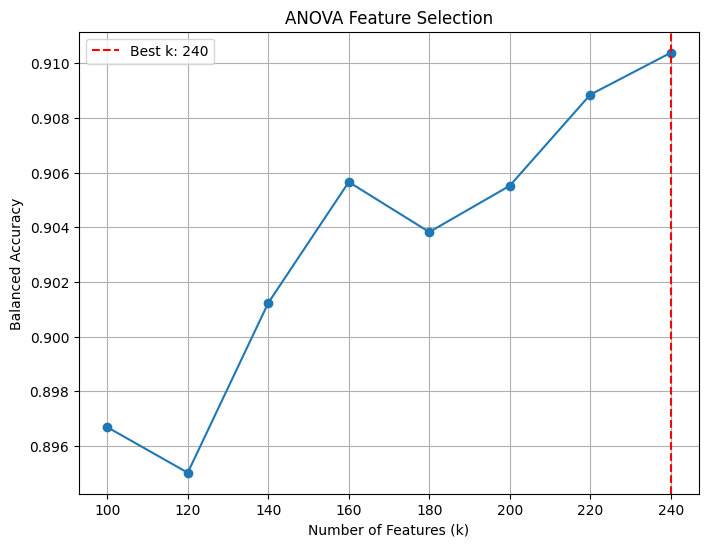


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.9100
  Balanced Accuracy = 0.9020
SVM:
  Accuracy = 0.8925
  Balanced Accuracy = 0.8828
Random Forest:
  Accuracy = 0.9375
  Balanced Accuracy = 0.9339

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.9100
  Balanced Accuracy = 0.9041
SVM:
  Accuracy = 0.8975
  Balanced Accuracy = 0.8881
Random Forest:
  Accuracy = 0.9350
  Balanced Accuracy = 0.9318

=== Feature Selection Heatmaps ===


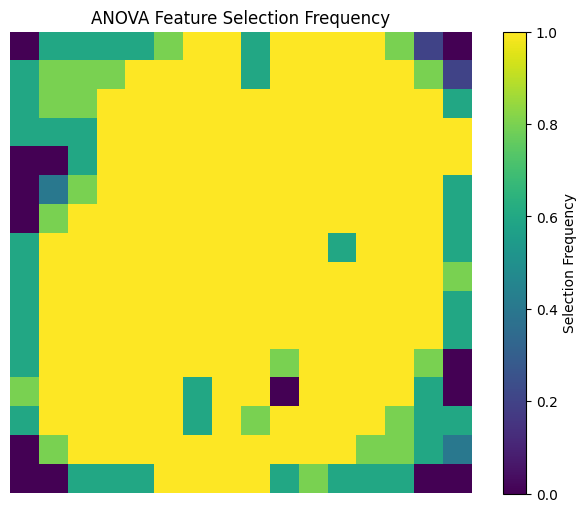

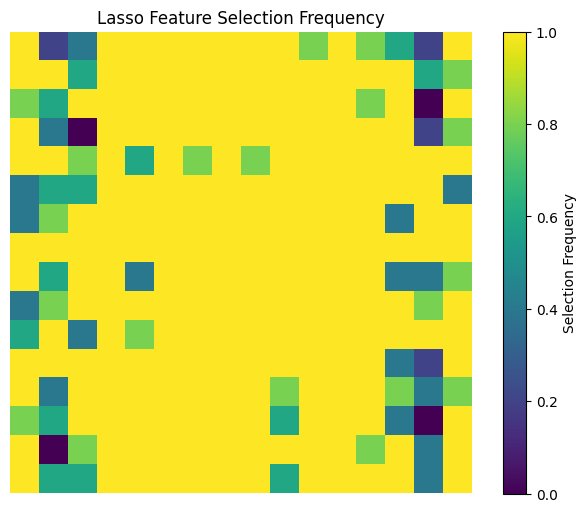

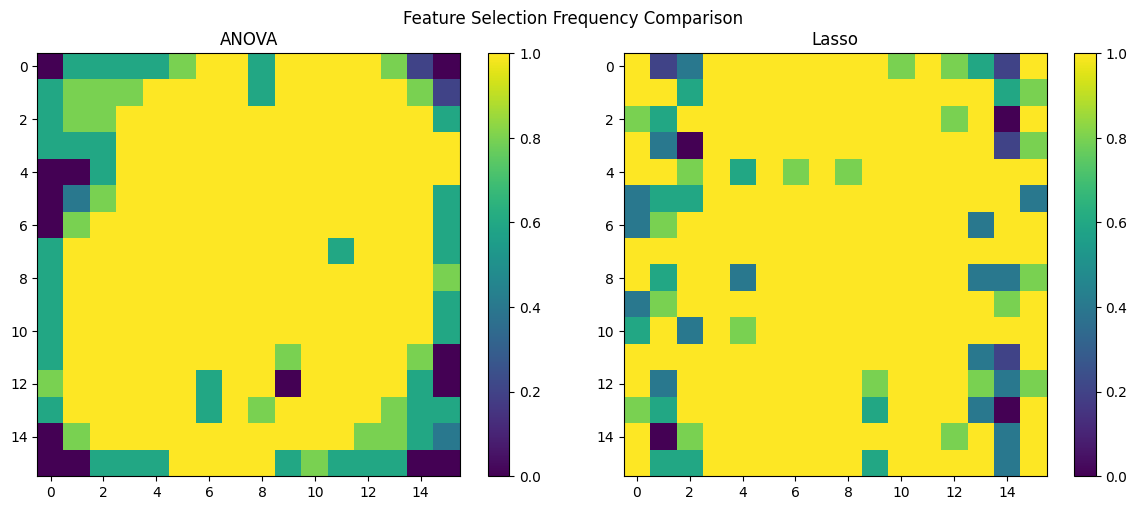


=== Performance Summary ===

Classifier: Logistic Regression

Method: ANOVA
  Avg best k: 220.0,'+-',25.3
  Accuracy: 0.9135 ± 0.0066
  Balanced Accuracy: 0.9045 ± 0.0059

Method: Lasso
  Avg best C: 0.4642
  Avg features: 229.0,'+-,',4.2
  Accuracy: 0.9170 ± 0.0037
  Balanced Accuracy: 0.9087 ± 0.0033

Classifier: SVM

Method: ANOVA
  Avg best k: 220.0,'+-',25.3
  Accuracy: 0.8870 ± 0.0173
  Balanced Accuracy: 0.8748 ± 0.0190

Method: Lasso
  Avg best C: 0.4642
  Avg features: 229.0,'+-,',4.2
  Accuracy: 0.8970 ± 0.0107
  Balanced Accuracy: 0.8860 ± 0.0120

Classifier: Random Forest

Method: ANOVA
  Avg best k: 220.0,'+-',25.3
  Accuracy: 0.9255 ± 0.0126
  Balanced Accuracy: 0.9174 ± 0.0137

Method: Lasso
  Avg best C: 0.4642
  Avg features: 229.0,'+-,',4.2
  Accuracy: 0.9295 ± 0.0064
  Balanced Accuracy: 0.9226 ± 0.0083


In [10]:
# --- Configuration ---
N_RUNS = 5                   # Number of experimental runs
K_VALUES = np.arange(100, 256, 20)    # Values of k to test for ANOVA
TEST_SIZE = 0.2              # Test set size
IMG_SHAPE = (16, 16)         # Assuming 16x16 images (256 features)

# --- Classifiers ---
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(penalty='l2', loss='squared_hinge', dual=False, max_iter=5000),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# --- Feature Selection Frequency Tracking ---
feature_selection_freq = {
    'ANOVA': np.zeros(IMG_SHAPE[0] * IMG_SHAPE[1]),  # Global tracking
    'Lasso': np.zeros(IMG_SHAPE[0] * IMG_SHAPE[1])
}

# --- Classifier Performance Results ---
results = defaultdict(lambda: {
    'ANOVA': {
        'best_k': [],
        'test_accuracies': [],
        'test_balanced_accuracy': []
    },
    'Lasso': {
        'best_C': [],
        'num_features': [],
        'test_accuracies': [],
        'test_balanced_accuracy': []
    }
})

# --- Main Experiment ---
for run in range(N_RUNS):
    print(f"\n{'='*20} RUN {run+1}/{N_RUNS} {'='*20}")
    random_state = run * 42
    
    # Data splitting
    X_train, X_test, y_train, y_test = train_test_split(
        images, labels, test_size=TEST_SIZE, 
        random_state=random_state, stratify=labels)
    
    # Pipeline: Feature scaling and selection
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('selector', SelectKBest(f_classif)),
        ('clf', LogisticRegression(solver='liblinear', max_iter=500))
    ])
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

    # === ANOVA Feature Selection ===
    print("\n=== ANOVA Feature Selection ===")
    cv_scores = []
    param_grid = {'selector__k': K_VALUES}

    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='balanced_accuracy')
    grid_search.fit(X_train, y_train)

    cv_scores = grid_search.cv_results_['mean_test_score']

    for k, score in zip(K_VALUES, cv_scores):
        print(f"k={k}: CV Balanced Accuracy = {score:.4f}")

    best_k = grid_search.best_params_['selector__k']
    print(f"Best k is: {best_k}")
    best_selector = SelectKBest(score_func=f_classif, k=best_k)
    X_train_selected = best_selector.fit_transform(X_train, y_train)
    X_test_selected = best_selector.transform(X_test)
    selected_indices = best_selector.get_support(indices=True)
    
    # Update ANOVA feature frequency globally
    feature_selection_freq['ANOVA'][selected_indices] += 1/N_RUNS

    plt.figure(figsize=(8, 6))
    plt.plot(K_VALUES, cv_scores, marker='o')
    plt.title("ANOVA Feature Selection")
    plt.xlabel("Number of Features (k)")
    plt.ylabel("Balanced Accuracy")
    plt.xticks(K_VALUES)
    plt.grid()
    plt.axvline(x=best_k, color='r', linestyle='--', label=f"Best k: {best_k}")
    plt.legend()
    plt.show()
    
    # === Lasso Feature Selection ===
    print("\n=== Lasso Feature Selection ===")
    lasso_pipeline = Pipeline([
        ('classifier', LogisticRegression(
            penalty='l1', solver='liblinear', 
            max_iter=200, random_state=random_state))
    ])
    grid_search = GridSearchCV(
        lasso_pipeline, 
        {'classifier__C': np.logspace(-3, 1, 7)}, 
        cv=cv, 
        scoring='balanced_accuracy',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    
    best_C = grid_search.best_params_['classifier__C']
    best_lasso = grid_search.best_estimator_.named_steps['classifier']
    selected_indices = np.where(np.abs(best_lasso.coef_).sum(axis=0) > 1e-6)[0]
    num_selected = len(selected_indices)
    
    # Update Lasso feature frequency globally
    feature_selection_freq['Lasso'][selected_indices] += 1/N_RUNS
    
    # === Classifier Evaluation ===
    for method in ['ANOVA', 'Lasso']:
        print(f"\n--- {method} Selected Features ---")
        if method == 'ANOVA':
            X_train_sel = X_train_selected
            X_test_sel = X_test_selected
        else:
            X_train_sel = X_train[:, selected_indices]
            X_test_sel = X_test[:, selected_indices]
        
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_sel, y_train)
            y_pred = clf.predict(X_test_sel)
            
            results[clf_name][method]['test_accuracies'].append(
                accuracy_score(y_test, y_pred))
            results[clf_name][method]['test_balanced_accuracy'].append(
                balanced_accuracy_score(y_test, y_pred))
            
            if method == 'ANOVA':
                results[clf_name][method]['best_k'].append(best_k)
            else:
                results[clf_name][method]['best_C'].append(best_C)
                results[clf_name][method]['num_features'].append(num_selected)
            
            print(f"{clf_name}:")
            print(f"  Accuracy = {accuracy_score(y_test, y_pred):.4f}")
            print(f"  Balanced Accuracy = {balanced_accuracy_score(y_test, y_pred):.4f}")

# === Visualizations ===
def plot_feature_heatmap(freq_array, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(freq_array.reshape(IMG_SHAPE), 
               cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Selection Frequency')
    plt.title(title)
    plt.axis('off')
    plt.show()

print("\n=== Feature Selection Heatmaps ===")
plot_feature_heatmap(feature_selection_freq['ANOVA'], "ANOVA Feature Selection Frequency")
plot_feature_heatmap(feature_selection_freq['Lasso'], "Lasso Feature Selection Frequency")

# Side-by-side comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(feature_selection_freq['ANOVA'].reshape(IMG_SHAPE),
           cmap='viridis', interpolation='nearest')
plt.title("ANOVA")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(feature_selection_freq['Lasso'].reshape(IMG_SHAPE),
           cmap='viridis', interpolation='nearest')
plt.title("Lasso")
plt.colorbar()
plt.suptitle("Feature Selection Frequency Comparison")
plt.tight_layout()
plt.show()

# === Performance Summary ===
print("\n=== Performance Summary ===")
for clf_name in classifiers:
    print(f"\nClassifier: {clf_name}")
    for method in ['ANOVA', 'Lasso']:
        print(f"\nMethod: {method}")
        if method == 'ANOVA':
            print(f"  Avg best k: {np.mean(results[clf_name][method]['best_k']):.1f},'+-',{np.std(results[clf_name][method]['best_k']):.1f}")
        else:
            print(f"  Avg best C: {np.mean(results[clf_name][method]['best_C']):.4f}")
            print(f"  Avg features: {np.mean(results[clf_name][method]['num_features']):.1f},'+-,',{np.std(results[clf_name][method]['num_features']):.1f}")
        
        print(f"  Accuracy: {np.mean(results[clf_name][method]['test_accuracies']):.4f} ± {np.std(results[clf_name][method]['test_accuracies']):.4f}")
        print(f"  Balanced Accuracy: {np.mean(results[clf_name][method]['test_balanced_accuracy']):.4f} ± {np.std(results[clf_name][method]['test_balanced_accuracy']):.4f}")

#### CatDogs: F-test and Lasso


==================== RUN 1/5 ====================

=== ANOVA Feature Selection ===
k=1500: CV Balanced Accuracy = 0.7913
k=1600: CV Balanced Accuracy = 0.7971
k=1700: CV Balanced Accuracy = 0.8033
k=1800: CV Balanced Accuracy = 0.8033
k=1900: CV Balanced Accuracy = 0.8162
k=2000: CV Balanced Accuracy = 0.8162
k=2100: CV Balanced Accuracy = 0.8100
k=2200: CV Balanced Accuracy = 0.8037
k=2300: CV Balanced Accuracy = 0.8037
k=2400: CV Balanced Accuracy = 0.7975
k=2500: CV Balanced Accuracy = 0.8037
k=2600: CV Balanced Accuracy = 0.8037
k=2700: CV Balanced Accuracy = 0.7975
k=2800: CV Balanced Accuracy = 0.7913
k=2900: CV Balanced Accuracy = 0.7979
k=3000: CV Balanced Accuracy = 0.8042
k=3100: CV Balanced Accuracy = 0.8104
k=3200: CV Balanced Accuracy = 0.8038
k=3300: CV Balanced Accuracy = 0.8100
k=3400: CV Balanced Accuracy = 0.8100
k=3500: CV Balanced Accuracy = 0.8163
k=3600: CV Balanced Accuracy = 0.8163
k=3700: CV Balanced Accuracy = 0.8100
k=3800: CV Balanced Accuracy = 0.8100
k=39

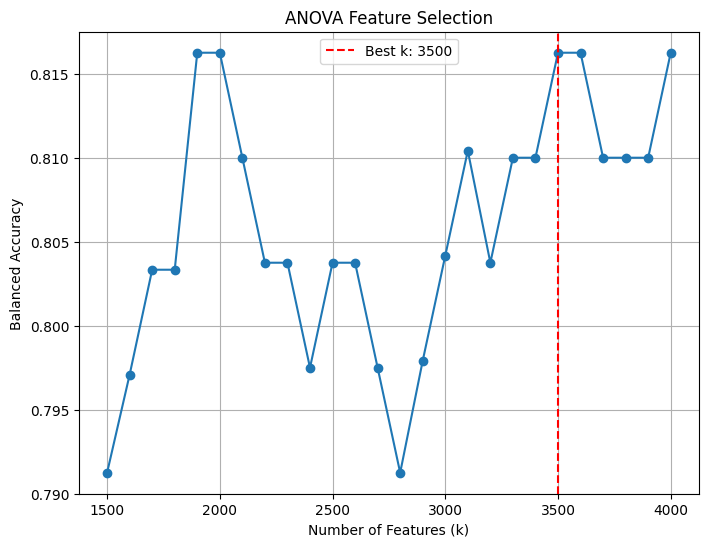


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.7750
  Balanced Accuracy = 0.7750


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8500
  Balanced Accuracy = 0.8500
Random Forest:
  Accuracy = 0.9000
  Balanced Accuracy = 0.9000

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750
SVM:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750

==================== RUN 2/5 ====================

=== ANOVA Feature Selection ===
k=1500: CV Balanced Accuracy = 0.8471
k=1600: CV Balanced Accuracy = 0.8596
k=1700: CV Balanced Accuracy = 0.8467
k=1800: CV Balanced Accuracy = 0.8408
k=1900: CV Balanced Accuracy = 0.8408
k=2000: CV Balanced Accuracy = 0.8408
k=2100: CV Balanced Accuracy = 0.8346
k=2200: CV Balanced Accuracy = 0.8408
k=2300: CV Balanced Accuracy = 0.8404
k=2400: CV Balanced Accuracy = 0.8408
k=2500: CV Balanced Accuracy = 0.8408
k=2600: CV Balanced Accuracy = 0.8408
k=2700: CV Balanced Accuracy = 0.8408
k=2800: CV Balanced Accuracy = 0.8408
k=2900: CV Balanced Accuracy = 0.8408
k=3000: CV Balanced Accuracy = 0.8408
k=3100: CV Balanced Accuracy = 0.8471
k=3200: CV Balanced Accuracy = 0.8471
k=3300: CV Balanced Accuracy = 0.8408
k=3400: CV Balanced Accuracy = 0.8471
k=3500: CV Balanced Accuracy = 0.8538
k=3600: CV Balanced Accuracy = 0.8538
k=3700: CV Balan

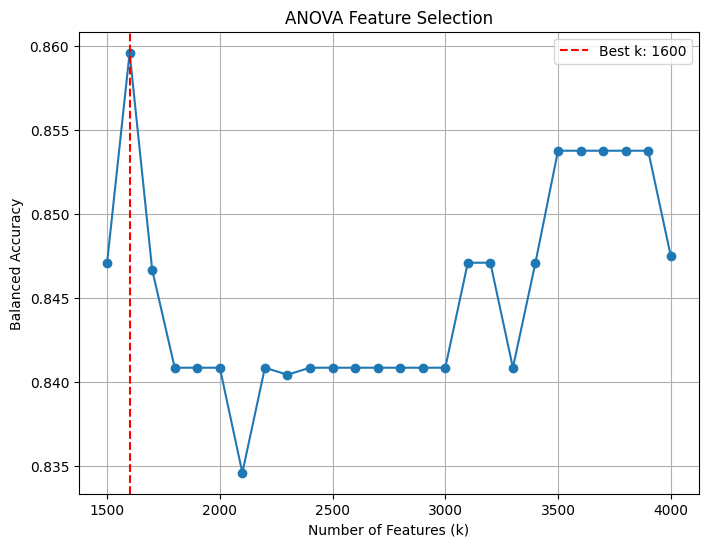


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8000
  Balanced Accuracy = 0.8000
Random Forest:
  Accuracy = 0.7250
  Balanced Accuracy = 0.7250

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8000
  Balanced Accuracy = 0.8000
SVM:
  Accuracy = 0.8000
  Balanced Accuracy = 0.8000


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500

==================== RUN 3/5 ====================

=== ANOVA Feature Selection ===
k=1500: CV Balanced Accuracy = 0.8167
k=1600: CV Balanced Accuracy = 0.8229
k=1700: CV Balanced Accuracy = 0.8292
k=1800: CV Balanced Accuracy = 0.8354
k=1900: CV Balanced Accuracy = 0.8350
k=2000: CV Balanced Accuracy = 0.8350
k=2100: CV Balanced Accuracy = 0.8417
k=2200: CV Balanced Accuracy = 0.8417
k=2300: CV Balanced Accuracy = 0.8417
k=2400: CV Balanced Accuracy = 0.8354
k=2500: CV Balanced Accuracy = 0.8292
k=2600: CV Balanced Accuracy = 0.8292
k=2700: CV Balanced Accuracy = 0.8354
k=2800: CV Balanced Accuracy = 0.8479
k=2900: CV Balanced Accuracy = 0.8354
k=3000: CV Balanced Accuracy = 0.8354
k=3100: CV Balanced Accuracy = 0.8354
k=3200: CV Balanced Accuracy = 0.8354
k=3300: CV Balanced Accuracy = 0.8350
k=3400: CV Balanced Accuracy = 0.8412
k=3500: CV Balanced Accuracy = 0.8412
k=3600: CV Balanced Accuracy = 0.8412
k=3700: CV Balan

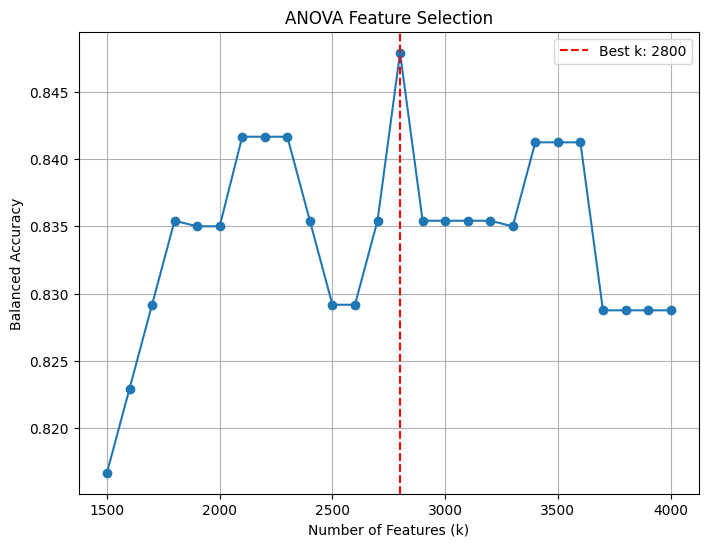


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8500
  Balanced Accuracy = 0.8500


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8500
  Balanced Accuracy = 0.8500
Random Forest:
  Accuracy = 0.6500
  Balanced Accuracy = 0.6500

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8250
  Balanced Accuracy = 0.8250
SVM:
  Accuracy = 0.8250
  Balanced Accuracy = 0.8250


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.7250
  Balanced Accuracy = 0.7250

==================== RUN 4/5 ====================

=== ANOVA Feature Selection ===
k=1500: CV Balanced Accuracy = 0.8171
k=1600: CV Balanced Accuracy = 0.8296
k=1700: CV Balanced Accuracy = 0.8296
k=1800: CV Balanced Accuracy = 0.8296
k=1900: CV Balanced Accuracy = 0.8358
k=2000: CV Balanced Accuracy = 0.8296
k=2100: CV Balanced Accuracy = 0.8358
k=2200: CV Balanced Accuracy = 0.8292
k=2300: CV Balanced Accuracy = 0.8292
k=2400: CV Balanced Accuracy = 0.8292
k=2500: CV Balanced Accuracy = 0.8229
k=2600: CV Balanced Accuracy = 0.8354
k=2700: CV Balanced Accuracy = 0.8292
k=2800: CV Balanced Accuracy = 0.8292
k=2900: CV Balanced Accuracy = 0.8229
k=3000: CV Balanced Accuracy = 0.8292
k=3100: CV Balanced Accuracy = 0.8292
k=3200: CV Balanced Accuracy = 0.8292
k=3300: CV Balanced Accuracy = 0.8292
k=3400: CV Balanced Accuracy = 0.8292
k=3500: CV Balanced Accuracy = 0.8292
k=3600: CV Balanced Accuracy = 0.8354
k=3700: CV Balan

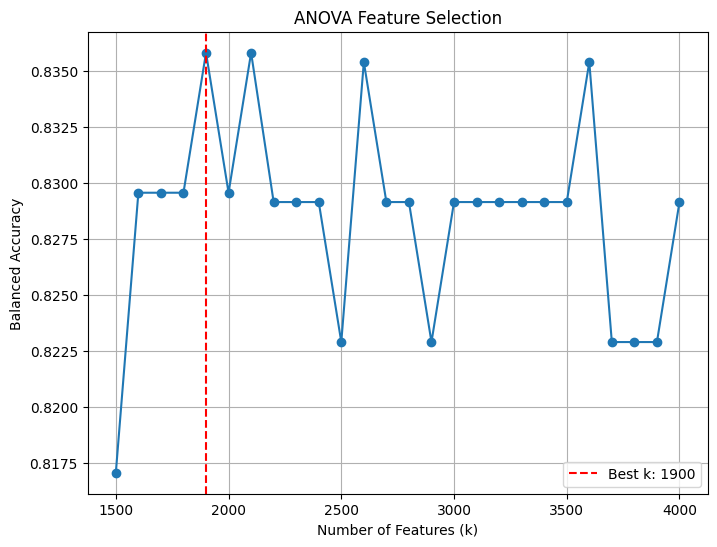


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.7750
  Balanced Accuracy = 0.7750


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8250
  Balanced Accuracy = 0.8250
Random Forest:
  Accuracy = 0.7250
  Balanced Accuracy = 0.7250

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8250
  Balanced Accuracy = 0.8250
Random Forest:
  Accuracy = 0.7250
  Balanced Accuracy = 0.7250

==================== RUN 5/5 ====================

=== ANOVA Feature Selection ===
k=1500: CV Balanced Accuracy = 0.8675
k=1600: CV Balanced Accuracy = 0.8613
k=1700: CV Balanced Accuracy = 0.8608
k=1800: CV Balanced Accuracy = 0.8608
k=1900: CV Balanced Accuracy = 0.8546
k=2000: CV Balanced Accuracy = 0.8546
k=2100: CV Balanced Accuracy = 0.8546
k=2200: CV Balanced Accuracy = 0.8546
k=2300: CV Balanced Accuracy = 0.8546
k=2400: CV Balanced Accuracy = 0.8546
k=2500: CV Balanced Accuracy = 0.8546
k=2600: CV Balanced Accuracy = 0.8546
k=2700: CV Balanced Accuracy = 0.8546
k=2800: CV Balanced Accuracy = 0.8546
k=2900: CV Balanced Accuracy = 0.8546
k=3000: CV Balanced Accuracy = 0.8483
k=3100: CV Balanced Accuracy = 0.8358
k=3200: CV Balanced Accuracy = 0.8358
k=3300: CV Balanced Accuracy = 0.8358
k=3400: CV Balanced Accuracy = 0.8358
k=3500: CV Balanced Accuracy = 0.8483


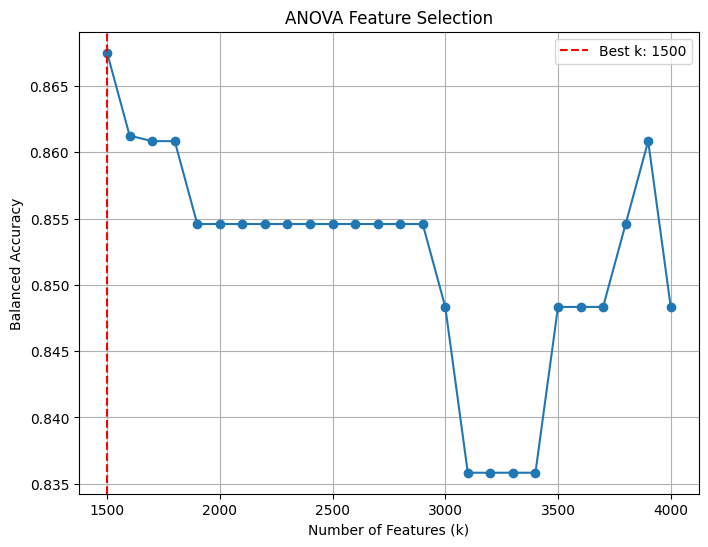


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750
Random Forest:
  Accuracy = 0.8500
  Balanced Accuracy = 0.8500

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8250
  Balanced Accuracy = 0.8250
SVM:
  Accuracy = 0.8250
  Balanced Accuracy = 0.8250


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.7750
  Balanced Accuracy = 0.7750

=== Feature Selection Heatmaps ===


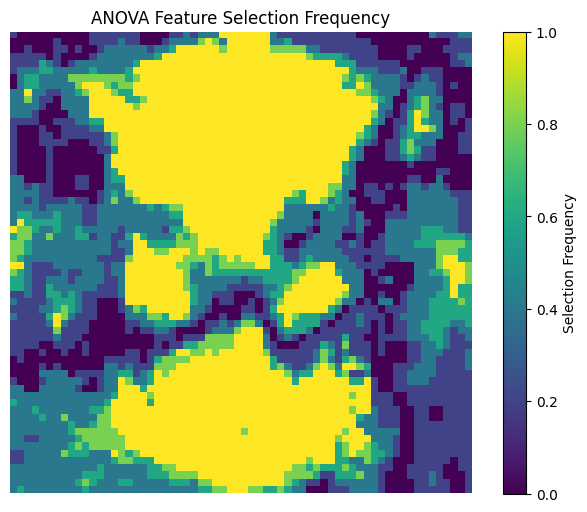

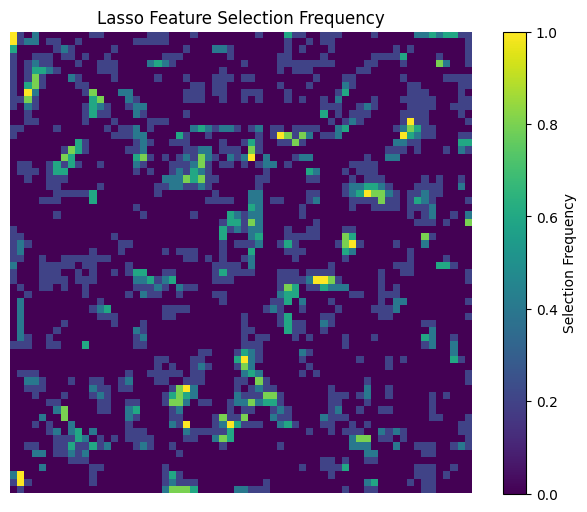

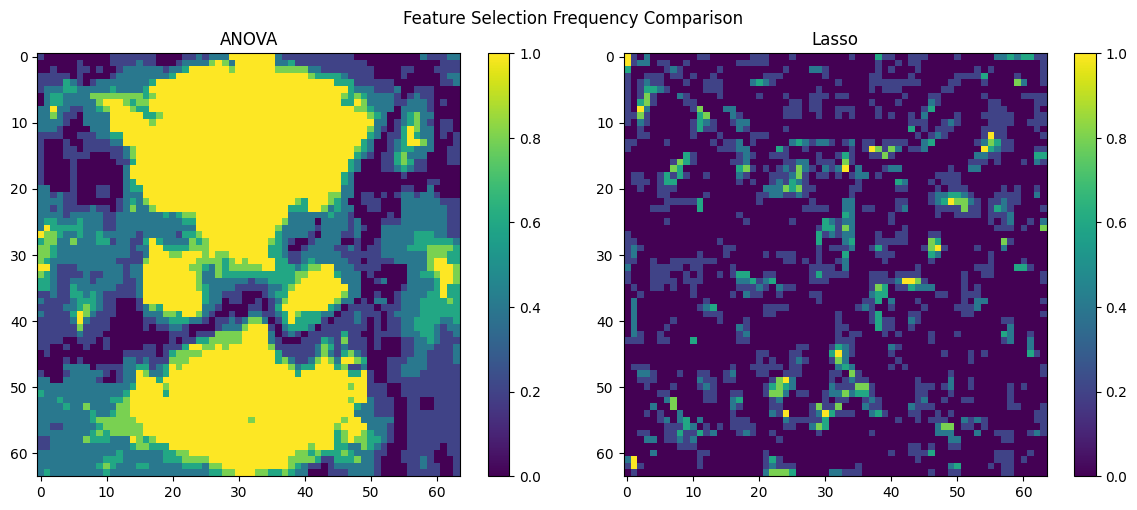


=== Performance Summary ===

Classifier: Logistic Regression

Method: ANOVA
  Avg best k: 2260.0,'+-',771.0
  Accuracy: 0.8050 ± 0.0485
  Balanced Accuracy: 0.8050 ± 0.0485

Method: Lasso
  Avg best C: 0.4918
  Avg features: 363.0,'+-,',390.8
  Accuracy: 0.8150 ± 0.0406
  Balanced Accuracy: 0.8150 ± 0.0406

Classifier: SVM

Method: ANOVA
  Avg best k: 2260.0,'+-',771.0
  Accuracy: 0.8400 ± 0.0255
  Balanced Accuracy: 0.8400 ± 0.0255

Method: Lasso
  Avg best C: 0.4918
  Avg features: 363.0,'+-,',390.8
  Accuracy: 0.8300 ± 0.0245
  Balanced Accuracy: 0.8300 ± 0.0245

Classifier: Random Forest

Method: ANOVA
  Avg best k: 2260.0,'+-',771.0
  Accuracy: 0.7700 ± 0.0914
  Balanced Accuracy: 0.7700 ± 0.0914

Method: Lasso
  Avg best C: 0.4918
  Avg features: 363.0,'+-,',390.8
  Accuracy: 0.7700 ± 0.0557
  Balanced Accuracy: 0.7700 ± 0.0557


In [11]:
# --- Configuration ---
N_RUNS = 5                   # Number of experimental runs
K_VALUES = np.arange(1500, 4096, 100)    # Values of k to test for ANOVA
TEST_SIZE = 0.2              # Test set size
IMG_SHAPE = (64, 64)         
# --- Classifiers ---
classifiers = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=200),
    "SVM": LinearSVC(penalty='l1', loss='squared_hinge', dual=False, max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# --- Feature Selection Frequency Tracking ---
feature_selection_freq = {
    'ANOVA': np.zeros(IMG_SHAPE[0] * IMG_SHAPE[1]),  # Global tracking
    'Lasso': np.zeros(IMG_SHAPE[0] * IMG_SHAPE[1])
}

# --- Classifier Performance Results ---
results = defaultdict(lambda: {
    'ANOVA': {
        'best_k': [],
        'test_accuracies': [],
        'test_balanced_accuracy': []
    },
    'Lasso': {
        'best_C': [],
        'num_features': [],
        'test_accuracies': [],
        'test_balanced_accuracy': []
    }
})

# --- Main Experiment ---
for run in range(N_RUNS):
    print(f"\n{'='*20} RUN {run+1}/{N_RUNS} {'='*20}")
    random_state = run * 42
    
    # Data splitting
    X_train, X_test, y_train, y_test = train_test_split(
        catdog, labels_cd, test_size=TEST_SIZE, 
        random_state=random_state, stratify=labels_cd)
    
     # Pipeline: Feature scaling and selection
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('selector', SelectKBest(f_classif)),
        ('clf', LogisticRegression(solver='liblinear', max_iter=500))
    ])
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

    # === ANOVA Feature Selection ===
    print("\n=== ANOVA Feature Selection ===")
    cv_scores = []
    param_grid = {'selector__k': K_VALUES}

    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='balanced_accuracy')
    grid_search.fit(X_train, y_train)

    cv_scores = grid_search.cv_results_['mean_test_score']

    for k, score in zip(K_VALUES, cv_scores):
        print(f"k={k}: CV Balanced Accuracy = {score:.4f}")

    best_k = grid_search.best_params_['selector__k']
    print(f"Best k is: {best_k}")
    best_selector = SelectKBest(score_func=f_classif, k=best_k)
    X_train_selected = best_selector.fit_transform(X_train, y_train)
    X_test_selected = best_selector.transform(X_test)
    selected_indices = best_selector.get_support(indices=True)
    
    # Update ANOVA feature frequency globally
    feature_selection_freq['ANOVA'][selected_indices] += 1/N_RUNS

    plt.figure(figsize=(8, 6))
    plt.plot(K_VALUES, cv_scores, marker='o')
    plt.title("ANOVA Feature Selection")
    plt.xlabel("Number of Features (k)")
    plt.ylabel("Balanced Accuracy")
    plt.grid()
    plt.axvline(x=best_k, color='r', linestyle='--', label=f"Best k: {best_k}")
    plt.legend()
    plt.show()
    
    # === Lasso Feature Selection ===
    print("\n=== Lasso Feature Selection ===")
    lasso_pipeline = Pipeline([
        ('classifier', LogisticRegression(
            penalty='l1', solver='liblinear', 
            max_iter=200, random_state=random_state))
    ])
    grid_search = GridSearchCV(
        lasso_pipeline, 
        {'classifier__C': np.logspace(-3, 1, 7)}, 
        cv=cv, 
        scoring='balanced_accuracy',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    
    best_C = grid_search.best_params_['classifier__C']
    best_lasso = grid_search.best_estimator_.named_steps['classifier']
    selected_indices = np.where(np.abs(best_lasso.coef_).sum(axis=0) > 1e-6)[0]
    num_selected = len(selected_indices)
    
    # Update Lasso feature frequency globally
    feature_selection_freq['Lasso'][selected_indices] += 1/N_RUNS
    
    # === Classifier Evaluation ===
    for method in ['ANOVA', 'Lasso']:
        print(f"\n--- {method} Selected Features ---")
        if method == 'ANOVA':
            X_train_sel = X_train_selected
            X_test_sel = X_test_selected
        else:
            X_train_sel = X_train[:, selected_indices]
            X_test_sel = X_test[:, selected_indices]
        
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_sel, y_train)
            y_pred = clf.predict(X_test_sel)
            
            results[clf_name][method]['test_accuracies'].append(
                accuracy_score(y_test, y_pred))
            results[clf_name][method]['test_balanced_accuracy'].append(
                balanced_accuracy_score(y_test, y_pred))
            
            if method == 'ANOVA':
                results[clf_name][method]['best_k'].append(best_k)
            else:
                results[clf_name][method]['best_C'].append(best_C)
                results[clf_name][method]['num_features'].append(num_selected)
            
            print(f"{clf_name}:")
            print(f"  Accuracy = {accuracy_score(y_test, y_pred):.4f}")
            print(f"  Balanced Accuracy = {balanced_accuracy_score(y_test, y_pred):.4f}")

# === Visualizations ===
def plot_feature_heatmap(freq_array, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(rotateM(freq_array.reshape(IMG_SHAPE)), 
               cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Selection Frequency')
    plt.title(title)
    plt.axis('off')
    plt.show()

print("\n=== Feature Selection Heatmaps ===")
plot_feature_heatmap(feature_selection_freq['ANOVA'], "ANOVA Feature Selection Frequency")
plot_feature_heatmap(feature_selection_freq['Lasso'], "Lasso Feature Selection Frequency")

# Side-by-side comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(rotateM(feature_selection_freq['ANOVA'].reshape(IMG_SHAPE)),
           cmap='viridis', interpolation='nearest')
plt.title("ANOVA")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(rotateM(feature_selection_freq['Lasso'].reshape(IMG_SHAPE)),
           cmap='viridis', interpolation='nearest')
plt.title("Lasso")
plt.colorbar()
plt.suptitle("Feature Selection Frequency Comparison")
plt.tight_layout()
plt.show()

# === Performance Summary ===
print("\n=== Performance Summary ===")
for clf_name in classifiers:
    print(f"\nClassifier: {clf_name}")
    for method in ['ANOVA', 'Lasso']:
        print(f"\nMethod: {method}")
        if method == 'ANOVA':
            print(f"  Avg best k: {np.mean(results[clf_name][method]['best_k']):.1f},'+-',{np.std(results[clf_name][method]['best_k']):.1f}")
        else:
            print(f"  Avg best C: {np.mean(results[clf_name][method]['best_C']):.4f}")
            print(f"  Avg features: {np.mean(results[clf_name][method]['num_features']):.1f},'+-,',{np.std(results[clf_name][method]['num_features']):.1f}")
        
        print(f"  Accuracy: {np.mean(results[clf_name][method]['test_accuracies']):.4f} ± {np.std(results[clf_name][method]['test_accuracies']):.4f}")
        print(f"  Balanced Accuracy: {np.mean(results[clf_name][method]['test_balanced_accuracy']):.4f} ± {np.std(results[clf_name][method]['test_balanced_accuracy']):.4f}")

### Part 2: 80%, 50%, 20% sample size

#### MNIST


#################### SAMPLE SIZE: 0.8 ####################

==================== RUN 1/5 ====================

=== ANOVA Feature Selection ===


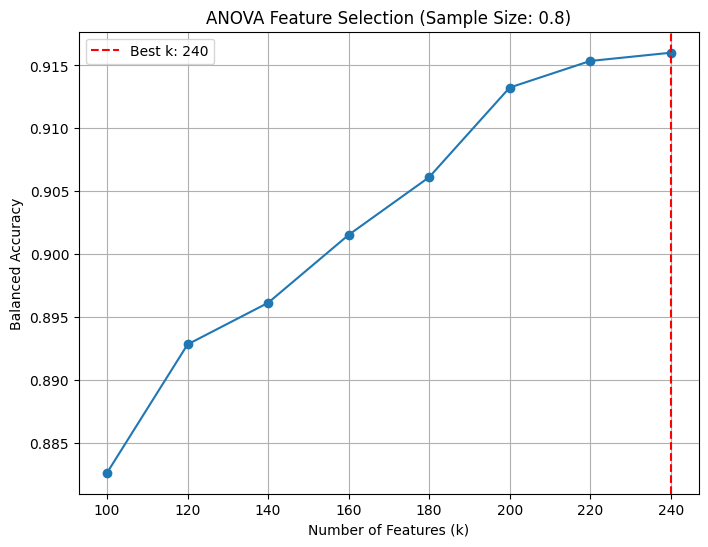


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.9219
  Balanced Accuracy = 0.9106


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.9031
  Balanced Accuracy = 0.8886
Random Forest:
  Accuracy = 0.9250
  Balanced Accuracy = 0.9117

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.9250
  Balanced Accuracy = 0.9138


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8938
  Balanced Accuracy = 0.8804
Random Forest:
  Accuracy = 0.9094
  Balanced Accuracy = 0.8952

==================== RUN 2/5 ====================

=== ANOVA Feature Selection ===


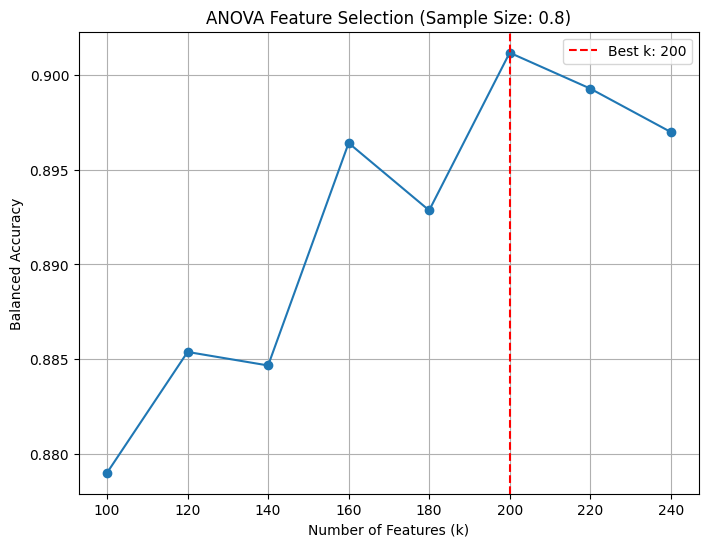


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.9125
  Balanced Accuracy = 0.9070


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8906
  Balanced Accuracy = 0.8754
Random Forest:
  Accuracy = 0.9344
  Balanced Accuracy = 0.9299

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.9125
  Balanced Accuracy = 0.9051


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8906
  Balanced Accuracy = 0.8791
Random Forest:
  Accuracy = 0.9344
  Balanced Accuracy = 0.9290

==================== RUN 3/5 ====================

=== ANOVA Feature Selection ===


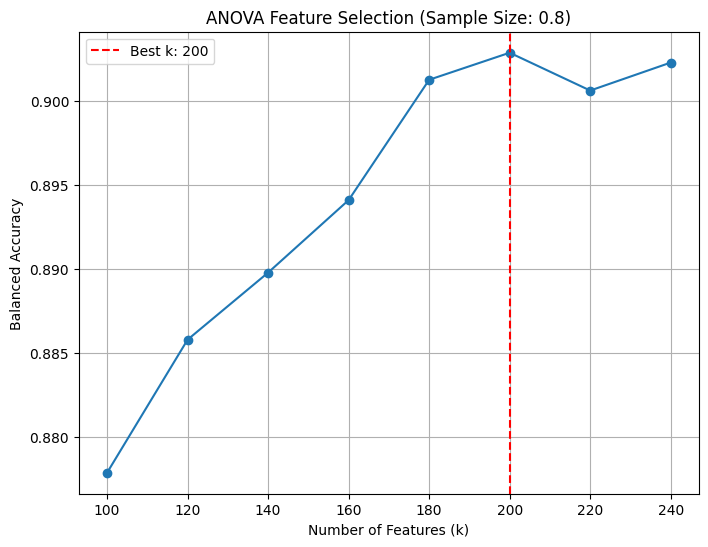


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.9375
  Balanced Accuracy = 0.9313


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.9156
  Balanced Accuracy = 0.9036
Random Forest:
  Accuracy = 0.9563
  Balanced Accuracy = 0.9485

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.9313
  Balanced Accuracy = 0.9217


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.9156
  Balanced Accuracy = 0.9016
Random Forest:
  Accuracy = 0.9531
  Balanced Accuracy = 0.9445

==================== RUN 4/5 ====================

=== ANOVA Feature Selection ===


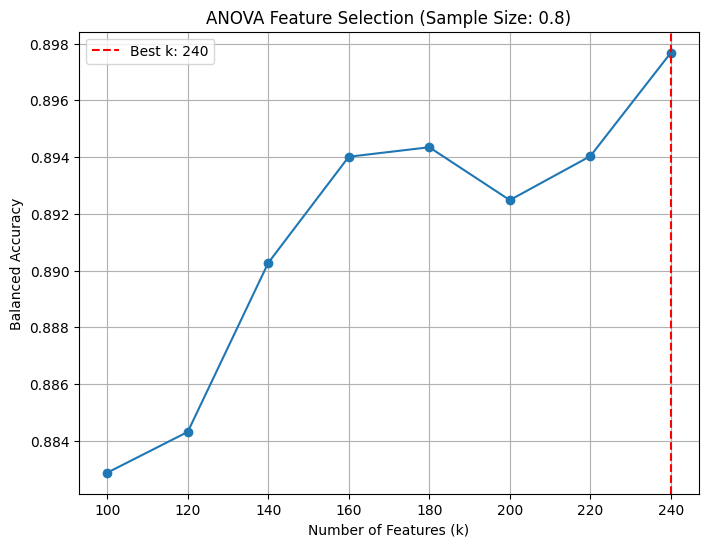


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.9313
  Balanced Accuracy = 0.9201


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.9000
  Balanced Accuracy = 0.8836
Random Forest:
  Accuracy = 0.9437
  Balanced Accuracy = 0.9328

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.9344
  Balanced Accuracy = 0.9225


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8906
  Balanced Accuracy = 0.8743
Random Forest:
  Accuracy = 0.9313
  Balanced Accuracy = 0.9232

==================== RUN 5/5 ====================

=== ANOVA Feature Selection ===


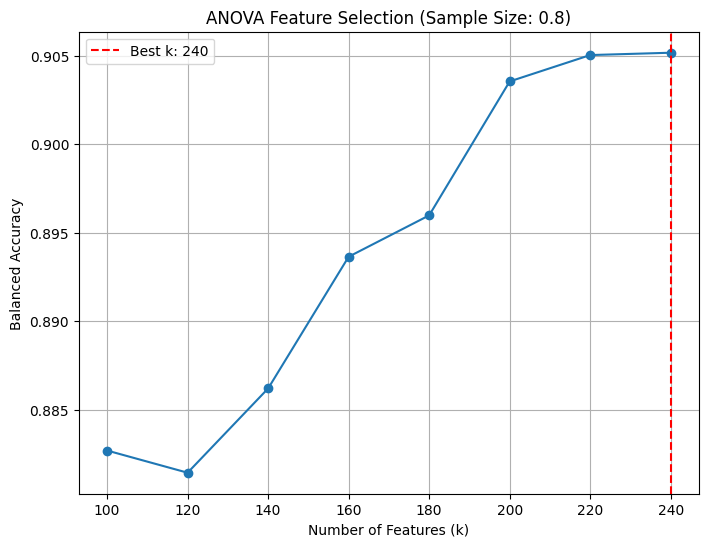


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.9062
  Balanced Accuracy = 0.9007


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.9250
  Balanced Accuracy = 0.9196
Random Forest:
  Accuracy = 0.9344
  Balanced Accuracy = 0.9291

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.9062
  Balanced Accuracy = 0.9007


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.9187
  Balanced Accuracy = 0.9150
Random Forest:
  Accuracy = 0.9344
  Balanced Accuracy = 0.9285

#################### SAMPLE SIZE: 0.5 ####################

==================== RUN 1/5 ====================

=== ANOVA Feature Selection ===


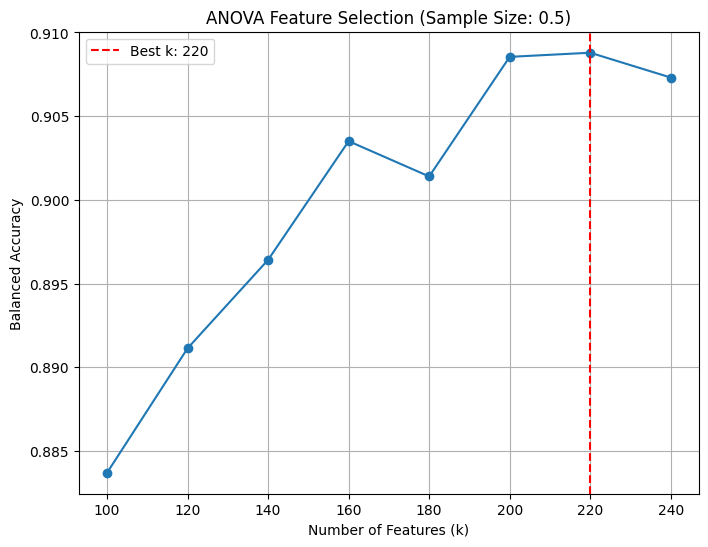


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8550
  Balanced Accuracy = 0.8350


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8500
  Balanced Accuracy = 0.8295
Random Forest:
  Accuracy = 0.9000
  Balanced Accuracy = 0.8836

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8550
  Balanced Accuracy = 0.8350


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8500
  Balanced Accuracy = 0.8324
Random Forest:
  Accuracy = 0.9100
  Balanced Accuracy = 0.8948

==================== RUN 2/5 ====================

=== ANOVA Feature Selection ===


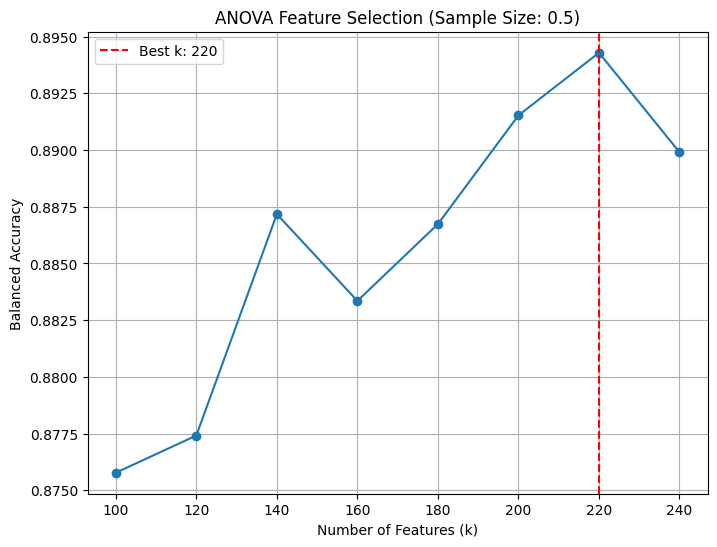


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8800
  Balanced Accuracy = 0.8711


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8500
  Balanced Accuracy = 0.8294
Random Forest:
  Accuracy = 0.9050
  Balanced Accuracy = 0.8956

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8900
  Balanced Accuracy = 0.8823


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8600
  Balanced Accuracy = 0.8406
Random Forest:
  Accuracy = 0.9150
  Balanced Accuracy = 0.9058

==================== RUN 3/5 ====================

=== ANOVA Feature Selection ===


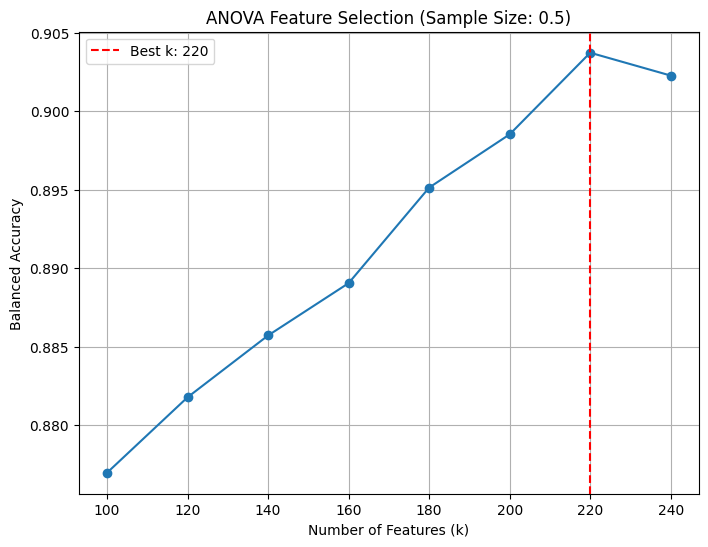


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8850
  Balanced Accuracy = 0.8737


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8500
  Balanced Accuracy = 0.8322
Random Forest:
  Accuracy = 0.9000
  Balanced Accuracy = 0.8892

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8800
  Balanced Accuracy = 0.8686


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8700
  Balanced Accuracy = 0.8529
Random Forest:
  Accuracy = 0.9050
  Balanced Accuracy = 0.8967

==================== RUN 4/5 ====================

=== ANOVA Feature Selection ===


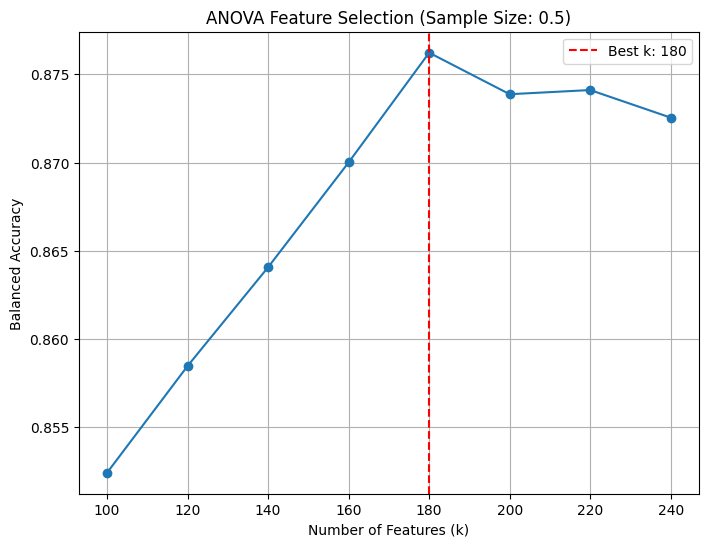


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8950
  Balanced Accuracy = 0.8790


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8850
  Balanced Accuracy = 0.8680
Random Forest:
  Accuracy = 0.9400
  Balanced Accuracy = 0.9348

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8950
  Balanced Accuracy = 0.8796


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8623
Random Forest:
  Accuracy = 0.9450
  Balanced Accuracy = 0.9401

==================== RUN 5/5 ====================

=== ANOVA Feature Selection ===


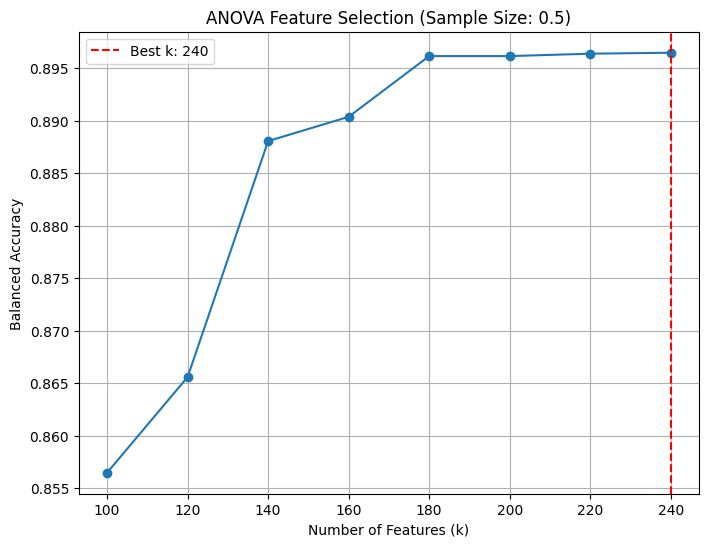


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.9150
  Balanced Accuracy = 0.9073


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.9100
  Balanced Accuracy = 0.8981
Random Forest:
  Accuracy = 0.9450
  Balanced Accuracy = 0.9410

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.9150
  Balanced Accuracy = 0.9073


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8850
  Balanced Accuracy = 0.8701
Random Forest:
  Accuracy = 0.9350
  Balanced Accuracy = 0.9296

#################### SAMPLE SIZE: 0.2 ####################

==================== RUN 1/5 ====================

=== ANOVA Feature Selection ===


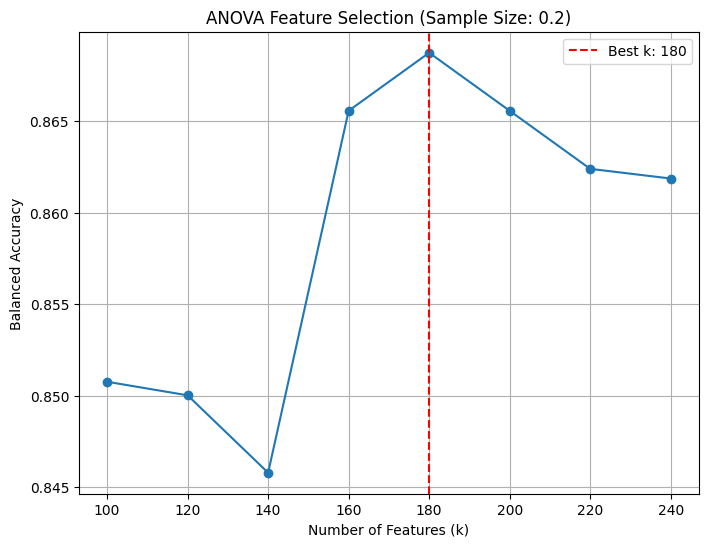


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8125
  Balanced Accuracy = 0.7983


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.7750
  Balanced Accuracy = 0.7586
Random Forest:
  Accuracy = 0.8000
  Balanced Accuracy = 0.7789

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8000
  Balanced Accuracy = 0.7903


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.7750
  Balanced Accuracy = 0.7665
Random Forest:
  Accuracy = 0.8000
  Balanced Accuracy = 0.7729

==================== RUN 2/5 ====================

=== ANOVA Feature Selection ===


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [240] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [240] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\s

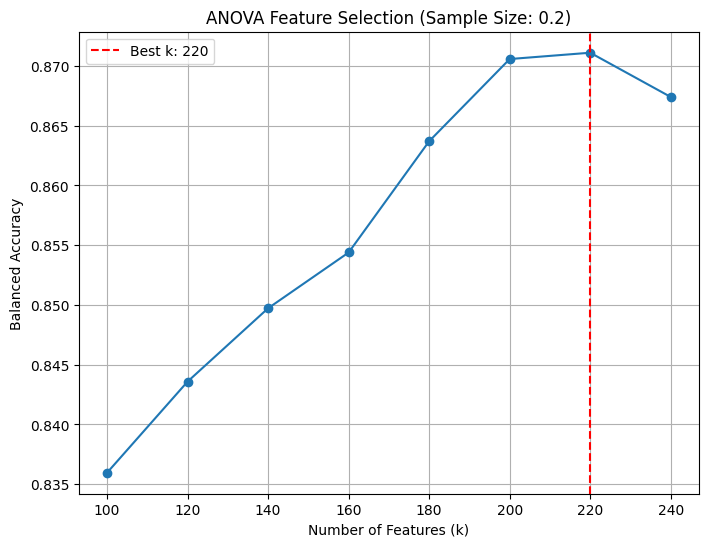


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.9375
  Balanced Accuracy = 0.9405


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.9125
  Balanced Accuracy = 0.9083
Random Forest:
  Accuracy = 0.9250
  Balanced Accuracy = 0.9266

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.9500
  Balanced Accuracy = 0.9484


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8706
Random Forest:
  Accuracy = 0.9250
  Balanced Accuracy = 0.9187

==================== RUN 3/5 ====================

=== ANOVA Feature Selection ===


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [240] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [240] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\s

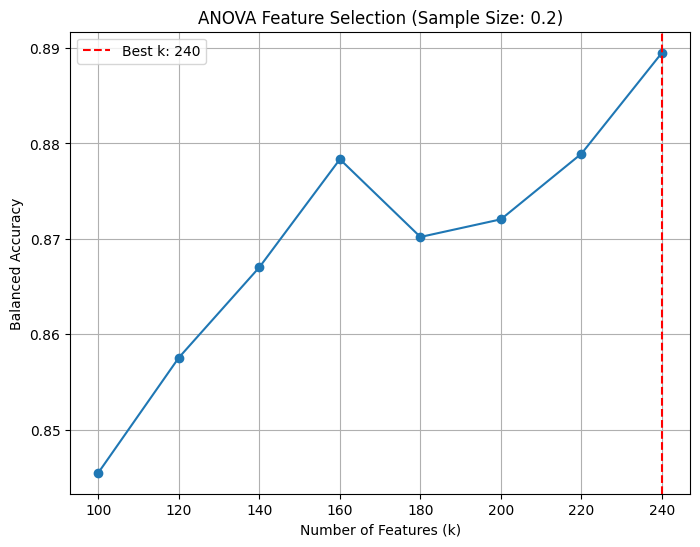


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8250
  Balanced Accuracy = 0.7948


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8125
  Balanced Accuracy = 0.7864
Random Forest:
  Accuracy = 0.8500
  Balanced Accuracy = 0.8230

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.7875
  Balanced Accuracy = 0.7546


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8125
  Balanced Accuracy = 0.7879
Random Forest:
  Accuracy = 0.9000
  Balanced Accuracy = 0.8845

==================== RUN 4/5 ====================

=== ANOVA Feature Selection ===


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [240] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [240] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\s

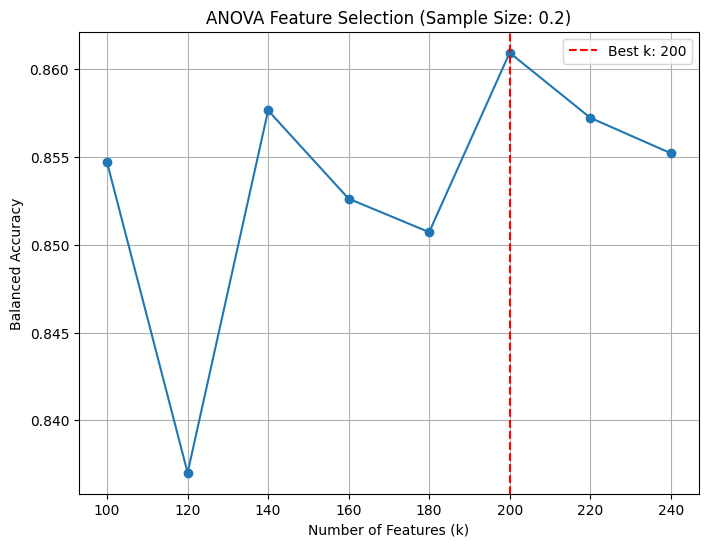


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8875
  Balanced Accuracy = 0.8805


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8375
  Balanced Accuracy = 0.8170
Random Forest:
  Accuracy = 0.9125
  Balanced Accuracy = 0.9083

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8875
  Balanced Accuracy = 0.8805


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8625
  Balanced Accuracy = 0.8488
Random Forest:
  Accuracy = 0.9000
  Balanced Accuracy = 0.8900

==================== RUN 5/5 ====================

=== ANOVA Feature Selection ===


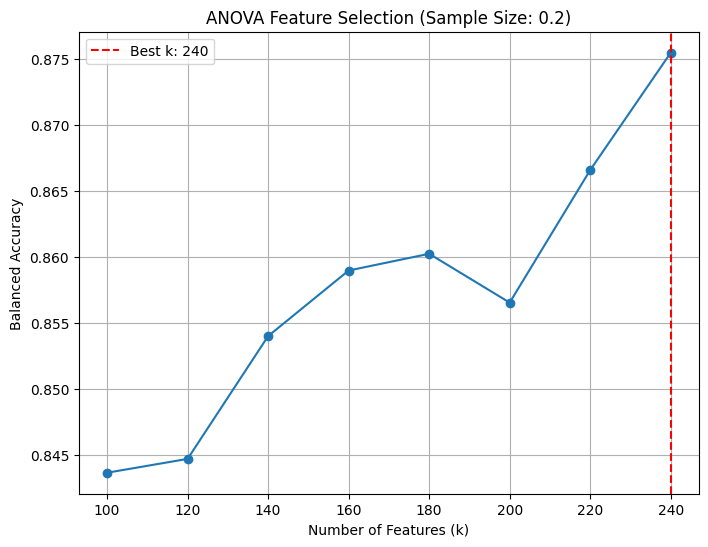


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8607


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8250
  Balanced Accuracy = 0.8022
Random Forest:
  Accuracy = 0.8500
  Balanced Accuracy = 0.8325

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8563


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8125
  Balanced Accuracy = 0.7844
Random Forest:
  Accuracy = 0.8375
  Balanced Accuracy = 0.8166

=== Feature Selection Heatmaps for Sample Size 0.8 ===


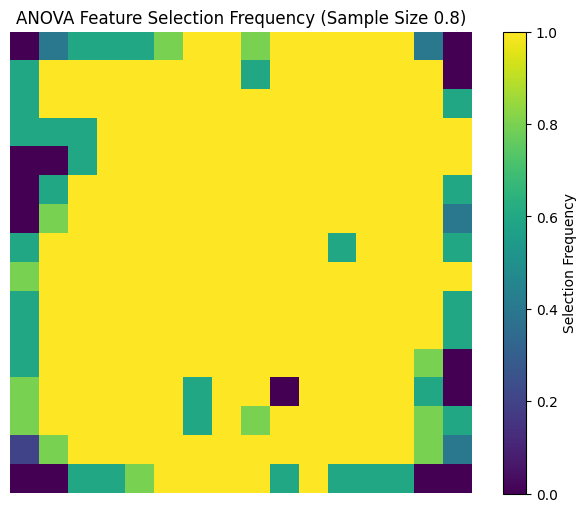

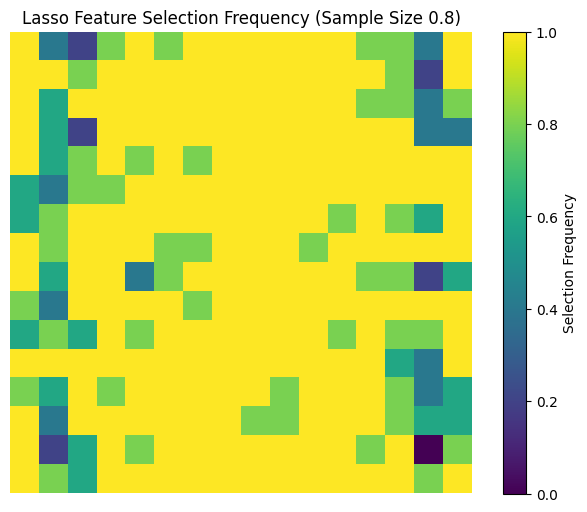

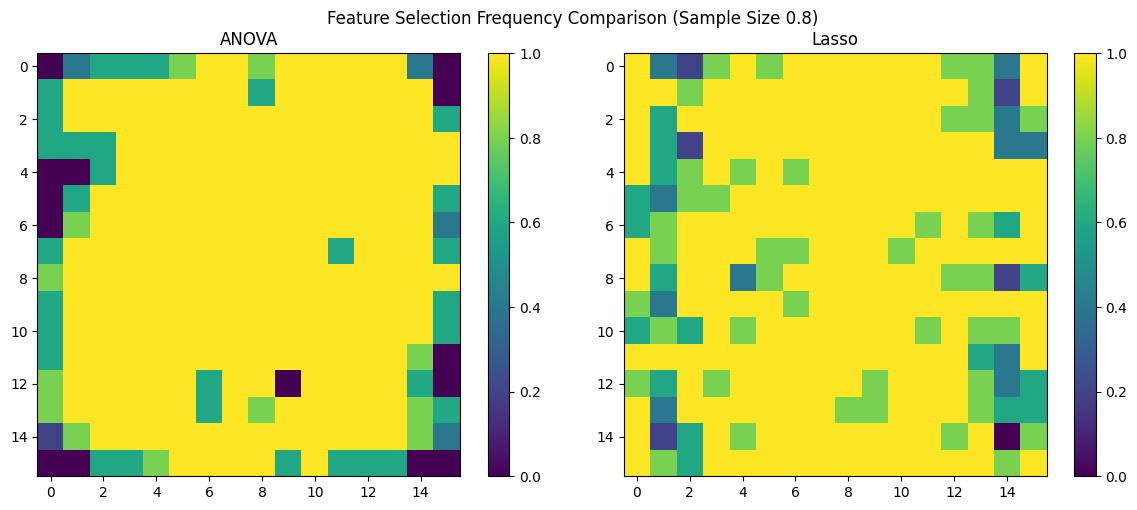


=== Feature Selection Heatmaps for Sample Size 0.5 ===


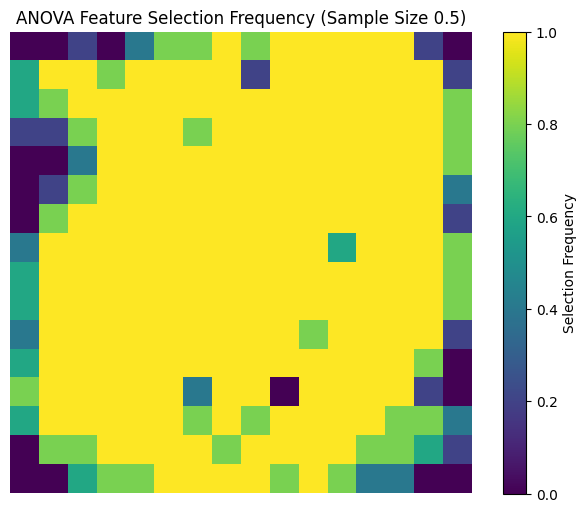

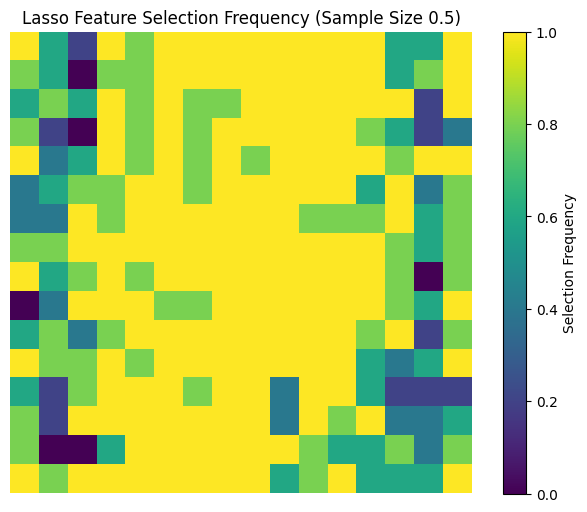

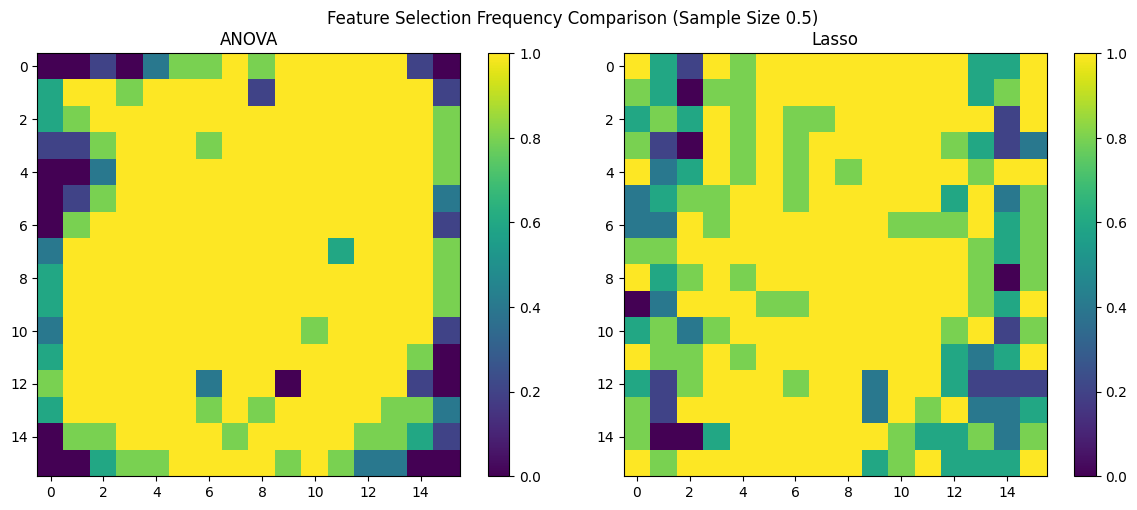


=== Feature Selection Heatmaps for Sample Size 0.2 ===


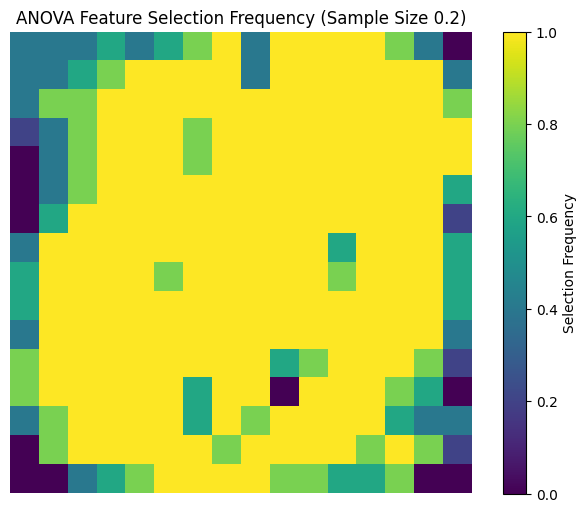

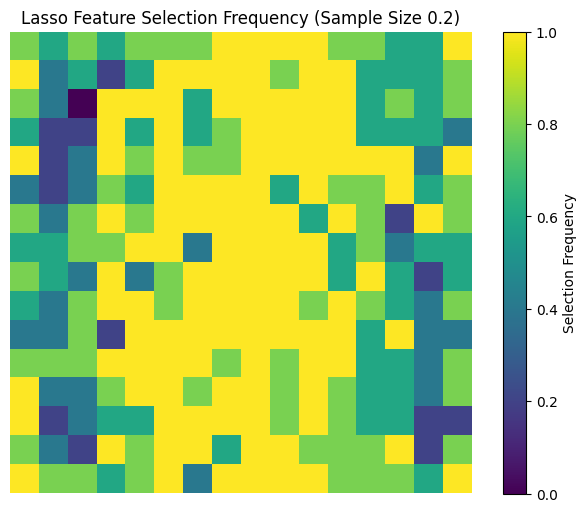

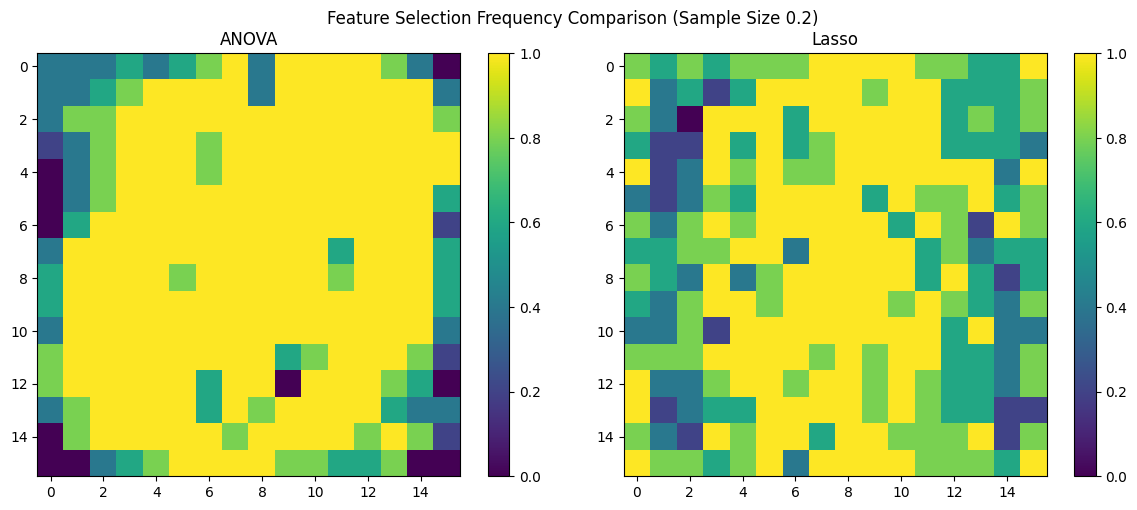


=== Performance Summary ===

----------------------------------------
Sample Size: 0.8
----------------------------------------

Classifier: Logistic Regression

Method: ANOVA
  Avg best k: 224.0,'+-',19.6
  Accuracy: 0.9219 ± 0.0115
  Balanced Accuracy: 0.9139 ± 0.0107

Method: Lasso
  Avg best C: 0.8022
  Avg features: 229.0,'+-,',8.9
  Accuracy: 0.9219 ± 0.0108
  Balanced Accuracy: 0.9128 ± 0.0087

Classifier: SVM

Method: ANOVA
  Avg best k: 224.0,'+-',19.6
  Accuracy: 0.9069 ± 0.0121
  Balanced Accuracy: 0.8942 ± 0.0157

Method: Lasso
  Avg best C: 0.8022
  Avg features: 229.0,'+-,',8.9
  Accuracy: 0.9019 ± 0.0126
  Balanced Accuracy: 0.8901 ± 0.0156

Classifier: Random Forest

Method: ANOVA
  Avg best k: 224.0,'+-',19.6
  Accuracy: 0.9387 ± 0.0106
  Balanced Accuracy: 0.9304 ± 0.0117

Method: Lasso
  Avg best C: 0.8022
  Avg features: 229.0,'+-,',8.9
  Accuracy: 0.9325 ± 0.0139
  Balanced Accuracy: 0.9241 ± 0.0161

----------------------------------------
Sample Size: 0.5
------

In [ ]:
# --- Configuration ---
N_RUNS = 5                   # Number of experimental runs
K_VALUES = np.arange(100, 256, 20)    # Values of k to test for ANOVA
TEST_SIZE = 0.2              # Test set size
IMG_SHAPE = (16, 16)         # Assuming 16x16 images (256 features)
SAMPLE_SIZES = [0.8, 0.5, 0.2]  # Fractions of full dataset to test

# --- Classifiers ---
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(penalty='l1', loss='squared_hinge', dual=False, max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# --- Feature Selection Frequency Tracking ---
feature_selection_freq = {
    sample_size: {
        'ANOVA': np.zeros(IMG_SHAPE[0] * IMG_SHAPE[1]),
        'Lasso': np.zeros(IMG_SHAPE[0] * IMG_SHAPE[1])
    }
    for sample_size in SAMPLE_SIZES
}

# --- Classifier Performance Results ---
results = {}
for clf_name in classifiers:
    results[clf_name] = {
        sample_size: {
            'ANOVA': {
                'best_k': [],
                'test_accuracies': [],
                'test_balanced_accuracy': []
            },
            'Lasso': {
                'best_C': [],
                'num_features': [],
                'test_accuracies': [],
                'test_balanced_accuracy': []
            }
        }
        for sample_size in SAMPLE_SIZES
    }

# --- Main Experiment ---
for sample_size in SAMPLE_SIZES:
    print(f"\n{'#'*20} SAMPLE SIZE: {sample_size} {'#'*20}")
    
    for run in range(N_RUNS):
        print(f"\n{'='*20} RUN {run+1}/{N_RUNS} {'='*20}")
        random_state = run * 42
        
        # Data splitting: first take a subset of the full dataset
        subset_images, _, subset_labels, _ = train_test_split(
            images, labels, 
            train_size=sample_size, 
            stratify=labels, 
            random_state=random_state)
        
        # Split subset into train and test
        X_train, X_test, y_train, y_test = train_test_split(
            subset_images, subset_labels, 
            test_size=TEST_SIZE, 
            random_state=random_state, 
            stratify=subset_labels)
        
        # Pipeline: Feature scaling and selection
        pipeline = Pipeline([
            ('scaler', MinMaxScaler()),
            ('selector', SelectKBest(f_classif)),
            ('clf', LogisticRegression(solver='liblinear', max_iter=500))
        ])
        
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

        # === ANOVA Feature Selection ===
        print("\n=== ANOVA Feature Selection ===")
        param_grid = {'selector__k': K_VALUES}
        grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='balanced_accuracy')
        grid_search.fit(X_train, y_train)
        
        best_k = grid_search.best_params_['selector__k']
        best_selector = SelectKBest(score_func=f_classif, k=best_k)
        X_train_selected = best_selector.fit_transform(X_train, y_train)
        X_test_selected = best_selector.transform(X_test)
        selected_indices = best_selector.get_support(indices=True)
        
        # Update ANOVA feature frequency
        feature_selection_freq[sample_size]['ANOVA'][selected_indices] += 1/N_RUNS

        # Plot ANOVA results
        plt.figure(figsize=(8, 6))
        plt.plot(K_VALUES, grid_search.cv_results_['mean_test_score'], marker='o')
        plt.title(f"ANOVA Feature Selection (Sample Size: {sample_size})")
        plt.xlabel("Number of Features (k)")
        plt.ylabel("Balanced Accuracy")
        plt.xticks(K_VALUES)
        plt.grid()
        plt.axvline(x=best_k, color='r', linestyle='--', label=f"Best k: {best_k}")
        plt.legend()
        plt.show()
        
        # === Lasso Feature Selection ===
        print("\n=== Lasso Feature Selection ===")
        lasso_pipeline = Pipeline([
            ('classifier', LogisticRegression(
                penalty='l1', solver='liblinear', 
                max_iter=200, random_state=random_state))
        ])
        grid_search = GridSearchCV(
            lasso_pipeline, 
            {'classifier__C': np.logspace(-3, 1, 7)}, 
            cv=cv, 
            scoring='balanced_accuracy',
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        
        best_C = grid_search.best_params_['classifier__C']
        best_lasso = grid_search.best_estimator_.named_steps['classifier']
        selected_indices = np.where(np.abs(best_lasso.coef_).sum(axis=0) > 1e-6)[0]
        num_selected = len(selected_indices)
        
        # Update Lasso feature frequency
        feature_selection_freq[sample_size]['Lasso'][selected_indices] += 1/N_RUNS
        
        # === Classifier Evaluation ===
        for method in ['ANOVA', 'Lasso']:
            print(f"\n--- {method} Selected Features ---")
            if method == 'ANOVA':
                X_train_sel = X_train_selected
                X_test_sel = X_test_selected
            else:
                X_train_sel = X_train[:, selected_indices]
                X_test_sel = X_test[:, selected_indices]
            
            for clf_name, clf in classifiers.items():
                clf.fit(X_train_sel, y_train)
                y_pred = clf.predict(X_test_sel)
                
                results[clf_name][sample_size][method]['test_accuracies'].append(
                    accuracy_score(y_test, y_pred))
                results[clf_name][sample_size][method]['test_balanced_accuracy'].append(
                    balanced_accuracy_score(y_test, y_pred))
                
                if method == 'ANOVA':
                    results[clf_name][sample_size][method]['best_k'].append(best_k)
                else:
                    results[clf_name][sample_size][method]['best_C'].append(best_C)
                    results[clf_name][sample_size][method]['num_features'].append(num_selected)
                
                print(f"{clf_name}:")
                print(f"  Accuracy = {accuracy_score(y_test, y_pred):.4f}")
                print(f"  Balanced Accuracy = {balanced_accuracy_score(y_test, y_pred):.4f}")

# === Visualizations ===
def plot_feature_heatmap(freq_array, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(freq_array.reshape(IMG_SHAPE), 
               cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Selection Frequency')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Feature selection heatmaps for each sample size
for sample_size in SAMPLE_SIZES:
    print(f"\n=== Feature Selection Heatmaps for Sample Size {sample_size} ===")
    
    # Individual heatmaps
    plot_feature_heatmap(
        feature_selection_freq[sample_size]['ANOVA'], 
        f"ANOVA Feature Selection Frequency (Sample Size {sample_size})"
    )
    plot_feature_heatmap(
        feature_selection_freq[sample_size]['Lasso'], 
        f"Lasso Feature Selection Frequency (Sample Size {sample_size})"
    )
    
    # Side-by-side comparison
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(feature_selection_freq[sample_size]['ANOVA'].reshape(IMG_SHAPE),
               cmap='viridis', interpolation='nearest')
    plt.title("ANOVA")
    plt.colorbar()
    plt.subplot(1, 2, 2)
    plt.imshow(feature_selection_freq[sample_size]['Lasso'].reshape(IMG_SHAPE),
               cmap='viridis', interpolation='nearest')
    plt.title("Lasso")
    plt.colorbar()
    plt.suptitle(f"Feature Selection Frequency Comparison (Sample Size {sample_size})")
    plt.tight_layout()
    plt.show()

# === Performance Summary ===
print("\n=== Performance Summary ===")
for sample_size in SAMPLE_SIZES:
    print(f"\n{'-'*40}\nSample Size: {sample_size}\n{'-'*40}")
    for clf_name in classifiers:
        print(f"\nClassifier: {clf_name}")
        for method in ['ANOVA', 'Lasso']:
            print(f"\nMethod: {method}")
            if method == 'ANOVA':
                print(f"  Avg best k: {np.mean(results[clf_name][sample_size][method]['best_k']):.1f},'+-',{np.std(results[clf_name][sample_size][method]['best_k']):.1f}")
            else:
                print(f"  Avg best C: {np.mean(results[clf_name][sample_size][method]['best_C']):.4f}")
                print(f"  Avg features: {np.mean(results[clf_name][sample_size][method]['num_features']):.1f},'+-,',{np.std(results[clf_name][sample_size][method]['num_features']):.1f}")
      
            print(f"  Accuracy: {np.mean(results[clf_name][sample_size][method]['test_accuracies']):.4f} ± {np.std(results[clf_name][sample_size][method]['test_accuracies']):.4f}")
            print(f"  Balanced Accuracy: {np.mean(results[clf_name][sample_size][method]['test_balanced_accuracy']):.4f} ± {np.std(results[clf_name][sample_size][method]['test_balanced_accuracy']):.4f}")

#### CatDogs


#################### SAMPLE SIZE: 0.8 ####################

==================== RUN 1/5 ====================

=== ANOVA Feature Selection ===


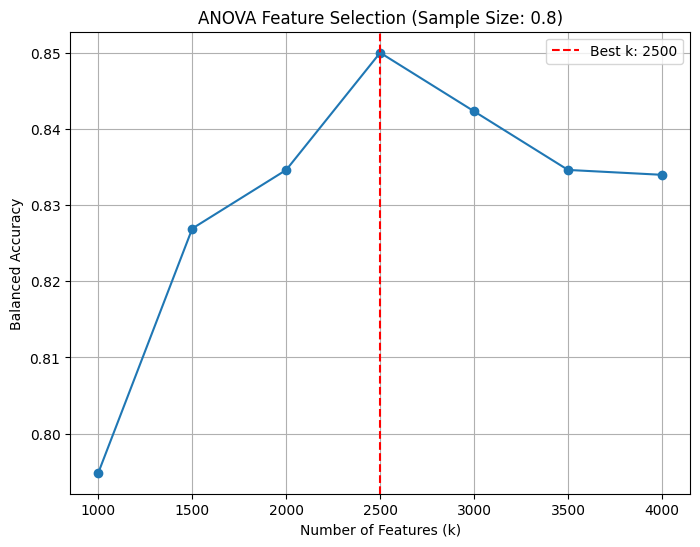


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8125
  Balanced Accuracy = 0.8125


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8438
  Balanced Accuracy = 0.8438
Random Forest:
  Accuracy = 0.7188
  Balanced Accuracy = 0.7188

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.7812
  Balanced Accuracy = 0.7812
SVM:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.7188
  Balanced Accuracy = 0.7188

==================== RUN 2/5 ====================

=== ANOVA Feature Selection ===


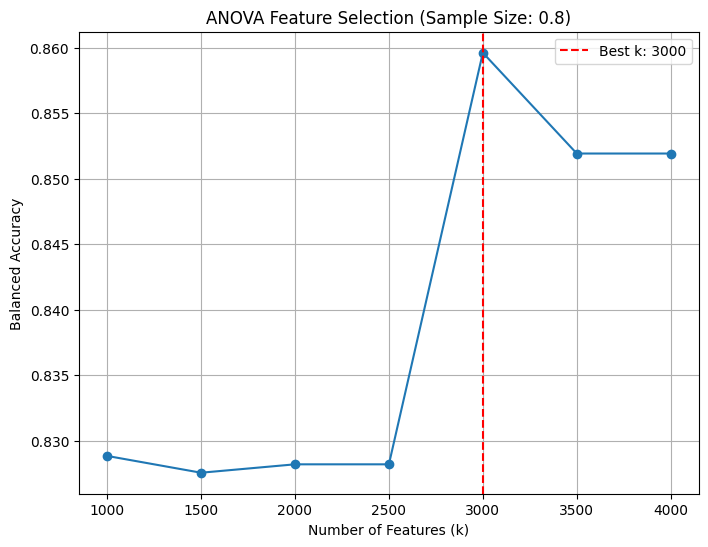


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750
Random Forest:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8438
  Balanced Accuracy = 0.8438


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.9062
  Balanced Accuracy = 0.9062
Random Forest:
  Accuracy = 0.9375
  Balanced Accuracy = 0.9375

==================== RUN 3/5 ====================

=== ANOVA Feature Selection ===


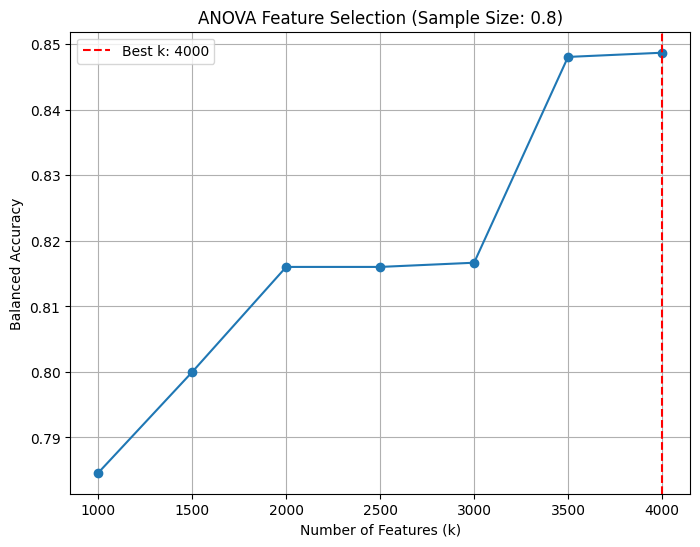


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8125
  Balanced Accuracy = 0.8125
Random Forest:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8125
  Balanced Accuracy = 0.8125


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8125
  Balanced Accuracy = 0.8125
Random Forest:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500

==================== RUN 4/5 ====================

=== ANOVA Feature Selection ===


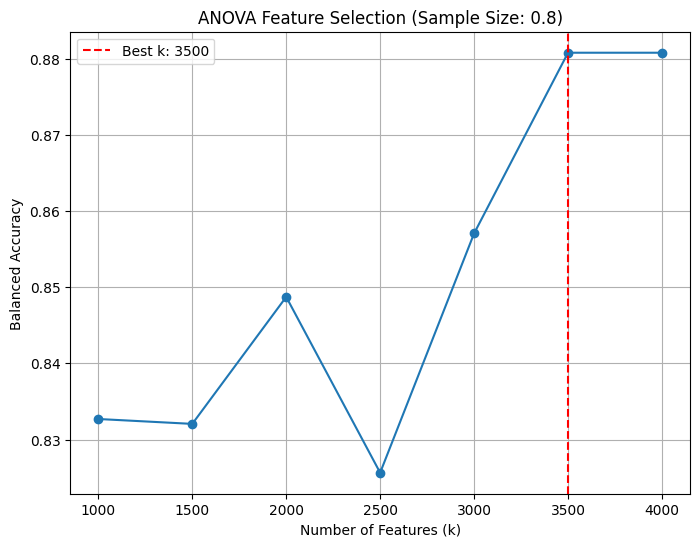


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8125
  Balanced Accuracy = 0.8125


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8125
  Balanced Accuracy = 0.8125
Random Forest:
  Accuracy = 0.7188
  Balanced Accuracy = 0.7188

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8125
  Balanced Accuracy = 0.8125


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8125
  Balanced Accuracy = 0.8125
Random Forest:
  Accuracy = 0.8438
  Balanced Accuracy = 0.8438

==================== RUN 5/5 ====================

=== ANOVA Feature Selection ===


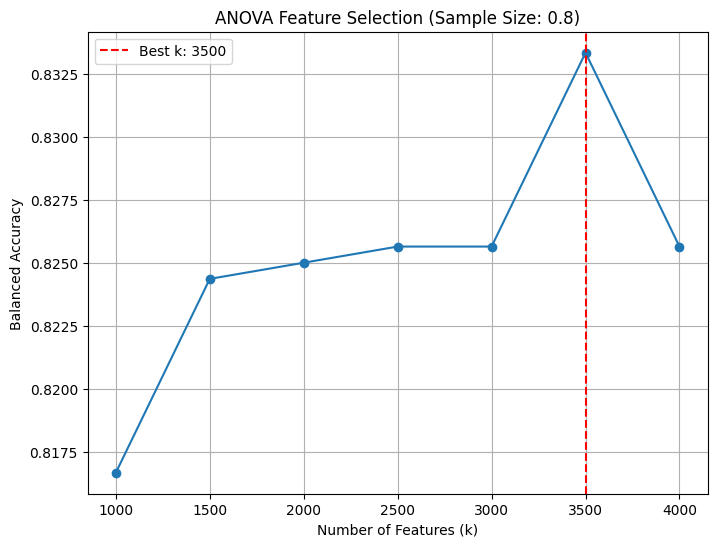


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.7188
  Balanced Accuracy = 0.7188
Random Forest:
  Accuracy = 0.8125
  Balanced Accuracy = 0.8125

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.7812
  Balanced Accuracy = 0.7812
SVM:
  Accuracy = 0.8438
  Balanced Accuracy = 0.8438


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.8125
  Balanced Accuracy = 0.8125

#################### SAMPLE SIZE: 0.5 ####################

==================== RUN 1/5 ====================

=== ANOVA Feature Selection ===


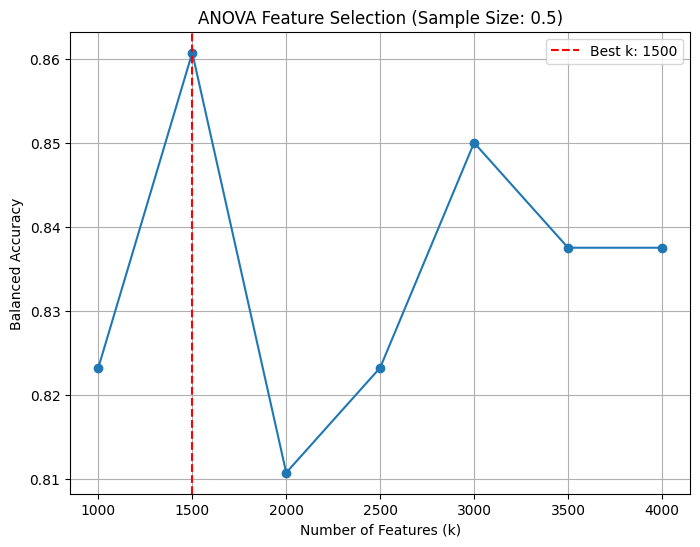


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8000
  Balanced Accuracy = 0.8000
Random Forest:
  Accuracy = 0.6000
  Balanced Accuracy = 0.6000

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500
SVM:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.6500
  Balanced Accuracy = 0.6500

==================== RUN 2/5 ====================

=== ANOVA Feature Selection ===


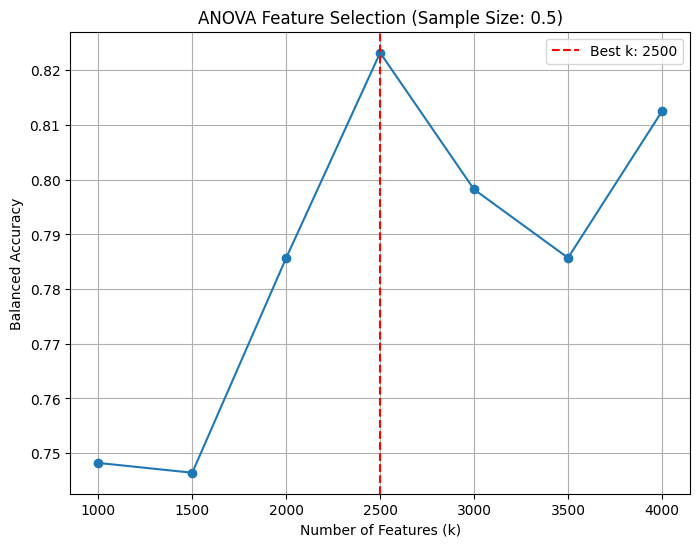


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.7000
  Balanced Accuracy = 0.7000


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500
Random Forest:
  Accuracy = 0.8000
  Balanced Accuracy = 0.8000

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500
Random Forest:
  Accuracy = 0.7000
  Balanced Accuracy = 0.7000

==================== RUN 3/5 ====================

=== ANOVA Feature Selection ===


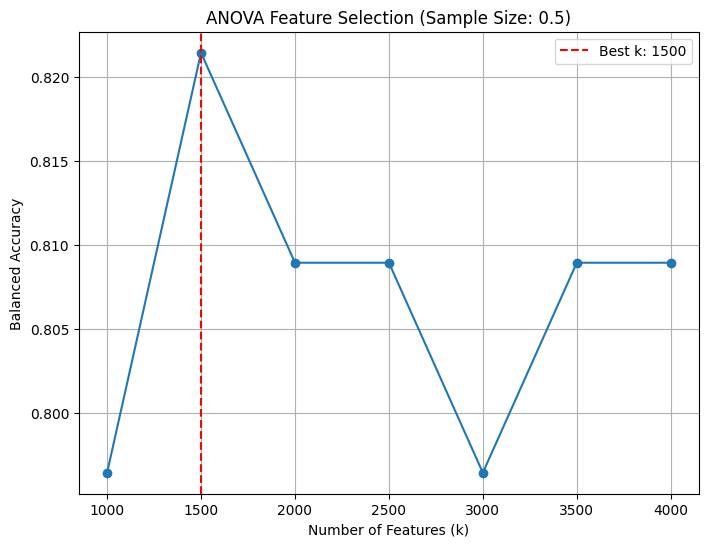


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.7000
  Balanced Accuracy = 0.7000


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.7000
  Balanced Accuracy = 0.7000
Random Forest:
  Accuracy = 0.7000
  Balanced Accuracy = 0.7000

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8000
  Balanced Accuracy = 0.8000
SVM:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.8000
  Balanced Accuracy = 0.8000

==================== RUN 4/5 ====================

=== ANOVA Feature Selection ===


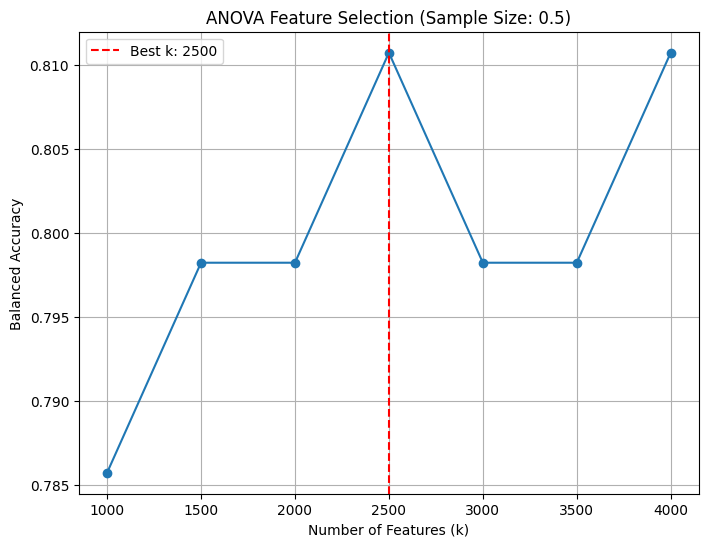


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.9500
  Balanced Accuracy = 0.9500


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8500
  Balanced Accuracy = 0.8500
Random Forest:
  Accuracy = 0.8500
  Balanced Accuracy = 0.8500

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8000
  Balanced Accuracy = 0.8000
SVM:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.8500
  Balanced Accuracy = 0.8500

==================== RUN 5/5 ====================

=== ANOVA Feature Selection ===


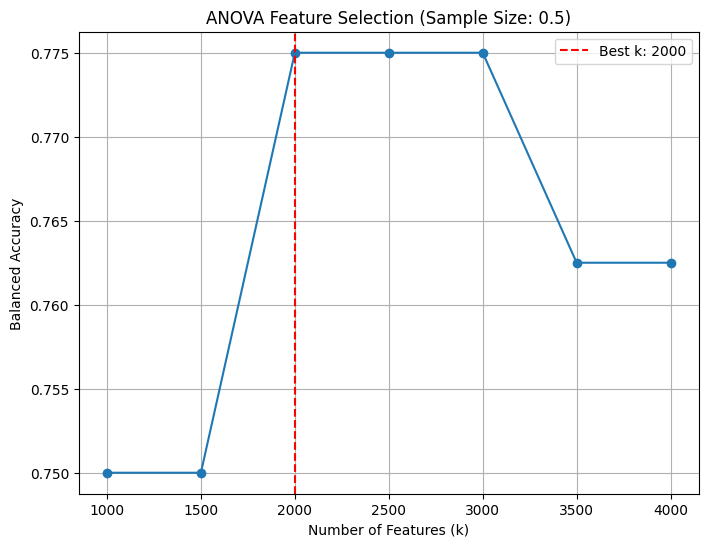


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8000
  Balanced Accuracy = 0.8000
SVM:
  Accuracy = 0.8500
  Balanced Accuracy = 0.8500


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.8000
  Balanced Accuracy = 0.8000

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.9000
  Balanced Accuracy = 0.9000
SVM:
  Accuracy = 0.9000
  Balanced Accuracy = 0.9000


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.8500
  Balanced Accuracy = 0.8500

#################### SAMPLE SIZE: 0.2 ####################

==================== RUN 1/5 ====================

=== ANOVA Feature Selection ===


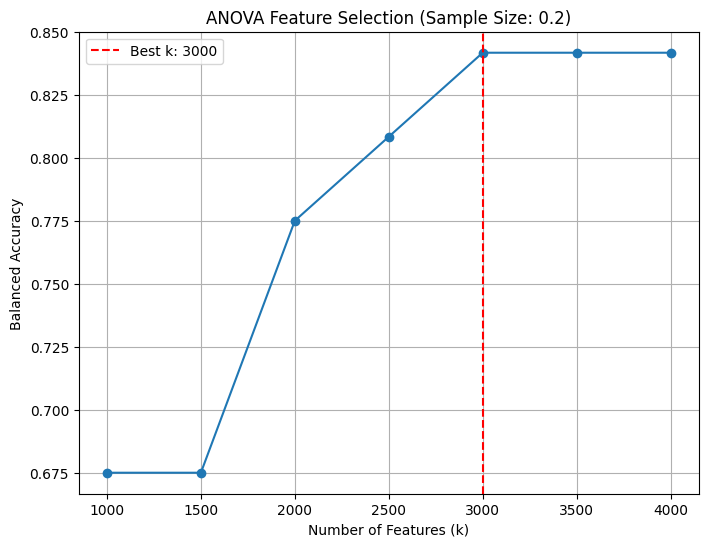


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 1.0000
  Balanced Accuracy = 1.0000


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 1.0000
  Balanced Accuracy = 1.0000
Random Forest:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 1.0000
  Balanced Accuracy = 1.0000
SVM:
  Accuracy = 1.0000
  Balanced Accuracy = 1.0000
Random Forest:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500

==================== RUN 2/5 ====================

=== ANOVA Feature Selection ===


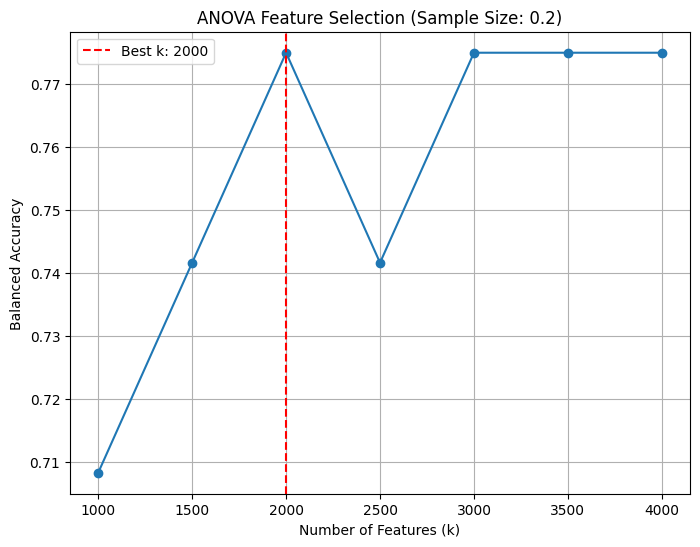


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750
Random Forest:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750
SVM:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750
Random Forest:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750

==================== RUN 3/5 ====================

=== ANOVA Feature Selection ===


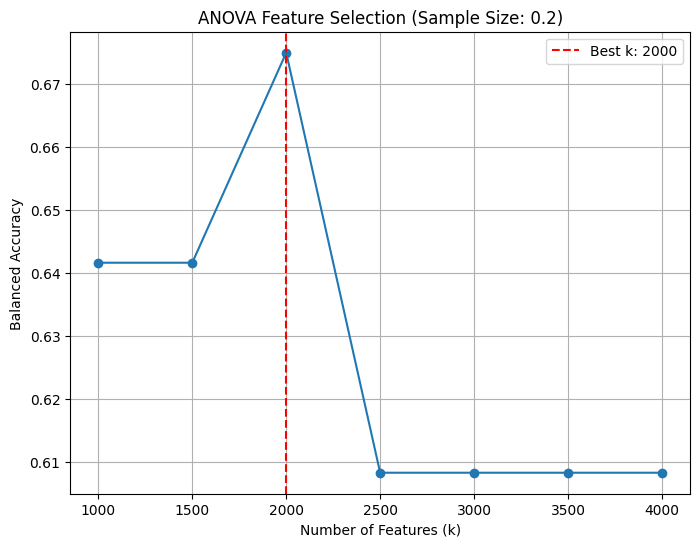


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 1.0000
  Balanced Accuracy = 1.0000


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750
Random Forest:
  Accuracy = 0.6250
  Balanced Accuracy = 0.6250

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500
SVM:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500
Random Forest:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500

==================== RUN 4/5 ====================

=== ANOVA Feature Selection ===


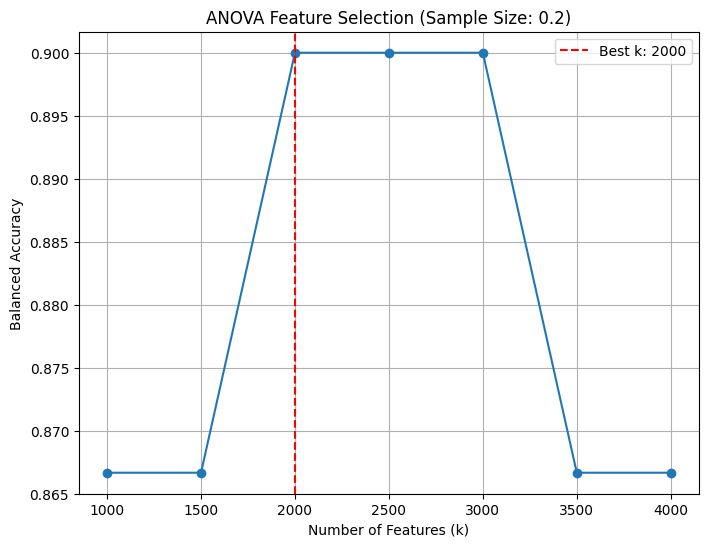


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 1.0000
  Balanced Accuracy = 1.0000
SVM:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750
Random Forest:
  Accuracy = 1.0000
  Balanced Accuracy = 1.0000

--- Lasso Selected Features ---


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Logistic Regression:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750
SVM:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750
Random Forest:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500

==================== RUN 5/5 ====================

=== ANOVA Feature Selection ===


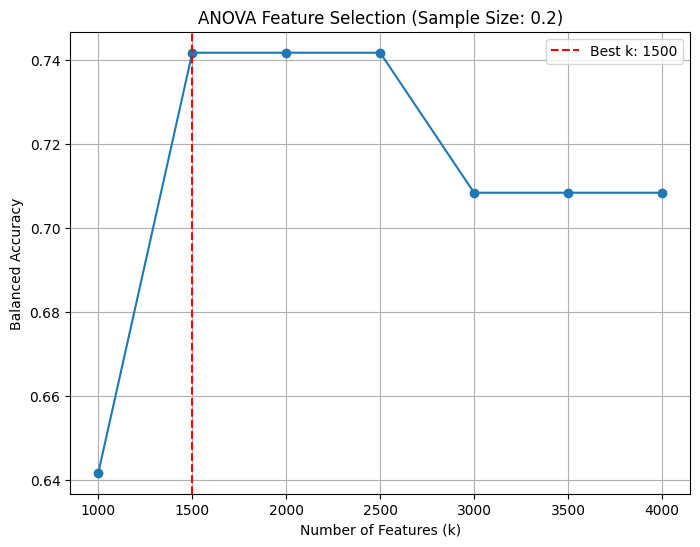


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.5000
  Balanced Accuracy = 0.5000


c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.3750
  Balanced Accuracy = 0.3750
Random Forest:
  Accuracy = 0.6250
  Balanced Accuracy = 0.6250

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.6250
  Balanced Accuracy = 0.6250
SVM:
  Accuracy = 0.5000
  Balanced Accuracy = 0.5000
Random Forest:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500

=== Feature Selection Heatmaps for Sample Size 0.8 ===


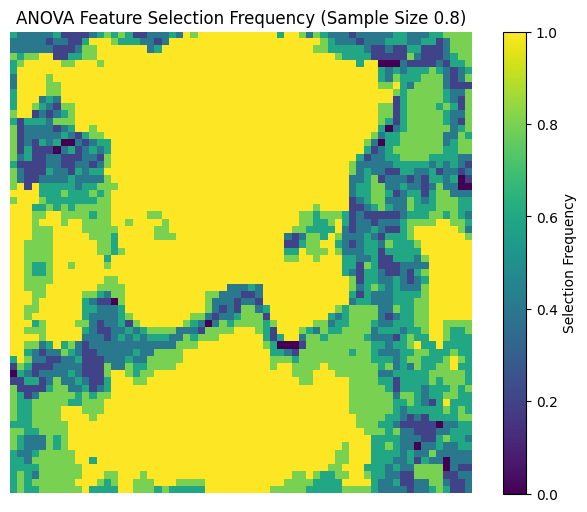

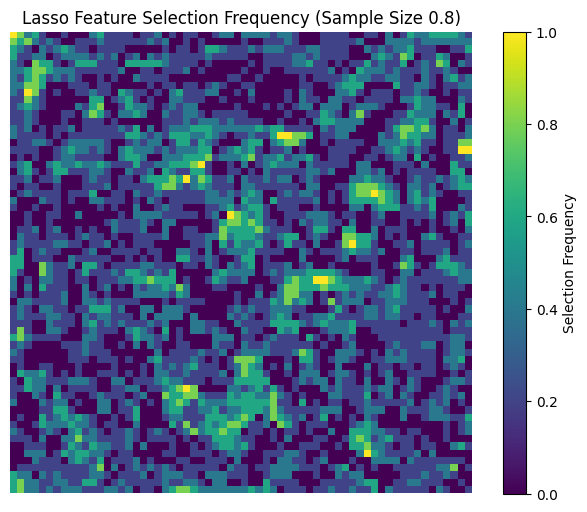

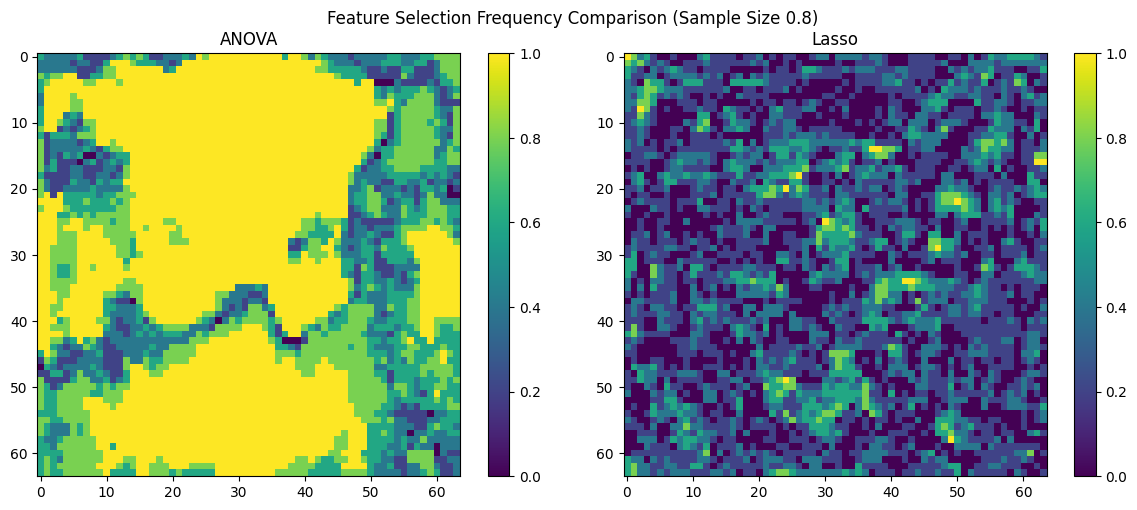


=== Feature Selection Heatmaps for Sample Size 0.5 ===


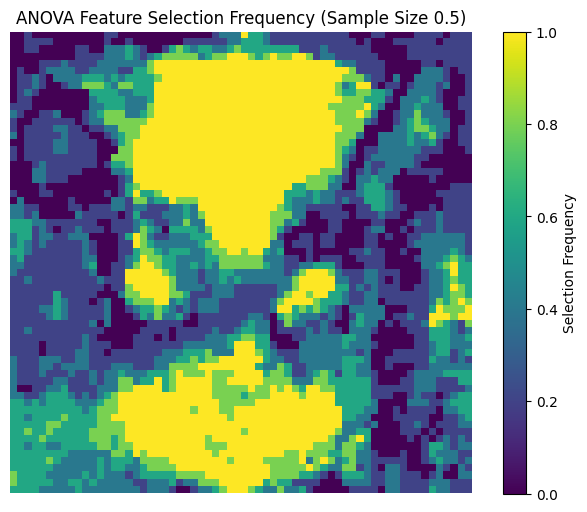

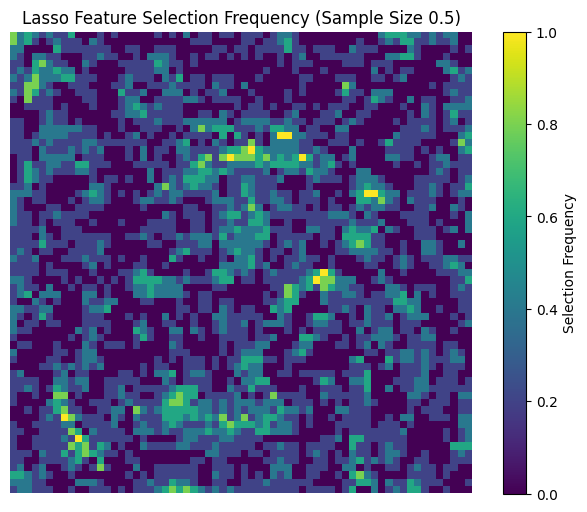

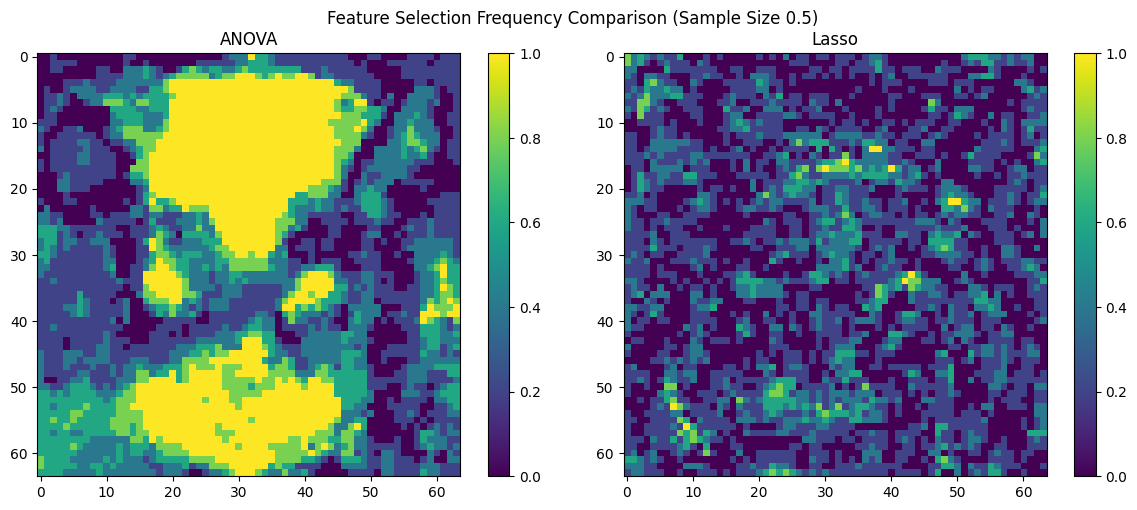


=== Feature Selection Heatmaps for Sample Size 0.2 ===


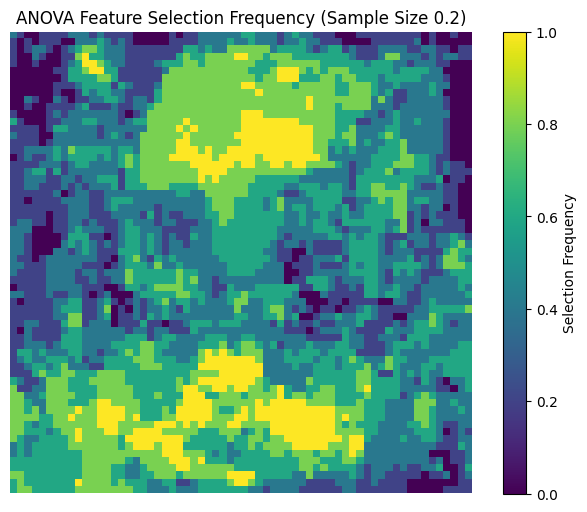

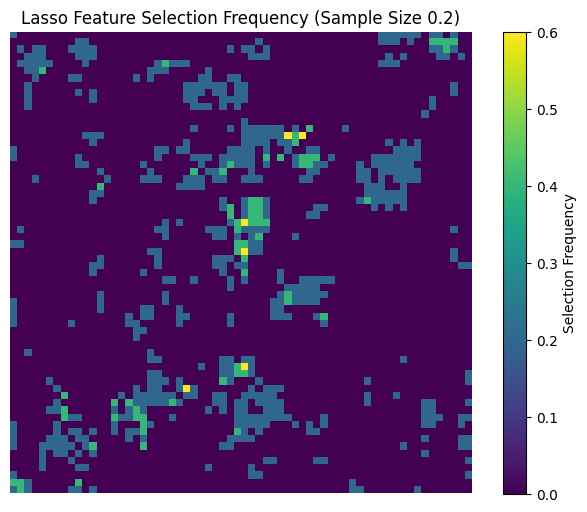

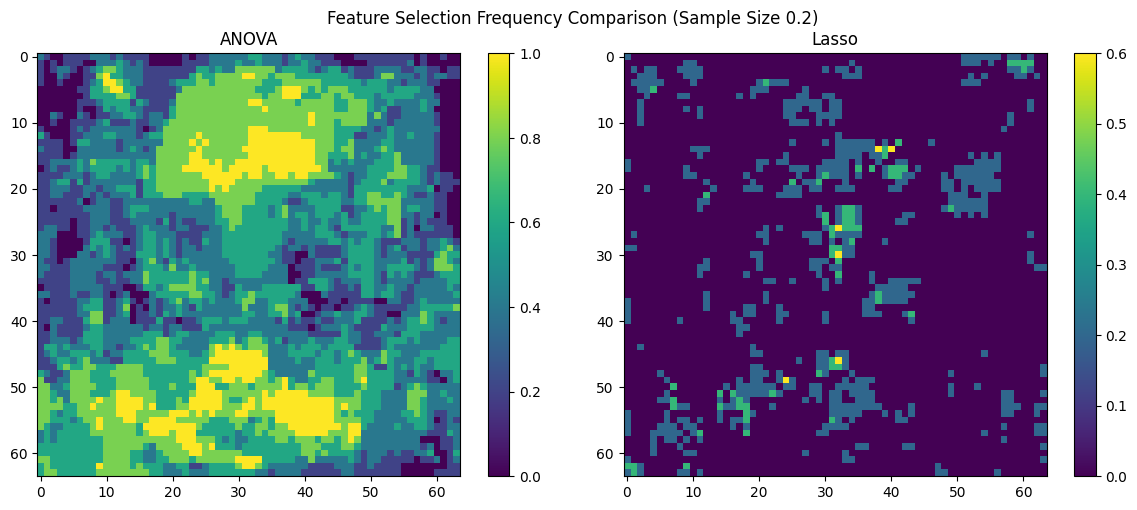


=== Performance Summary ===

----------------------------------------
Sample Size: 0.8
----------------------------------------

Classifier: Logistic Regression

Method: ANOVA
  Avg best k: 3300.0,'+-',509.9
  Accuracy: 0.8250 ± 0.0468
  Balanced Accuracy: 0.8250 ± 0.0468

Method: Lasso
  Avg best C: 4.4518
  Avg features: 987.2,'+-,',783.9
  Accuracy: 0.8063 ± 0.0234
  Balanced Accuracy: 0.8063 ± 0.0234

Classifier: SVM

Method: ANOVA
  Avg best k: 3300.0,'+-',509.9
  Accuracy: 0.8125 ± 0.0523
  Balanced Accuracy: 0.8125 ± 0.0523

Method: Lasso
  Avg best C: 4.4518
  Avg features: 987.2,'+-,',783.9
  Accuracy: 0.8250 ± 0.0508
  Balanced Accuracy: 0.8250 ± 0.0508

Classifier: Random Forest

Method: ANOVA
  Avg best k: 3300.0,'+-',509.9
  Accuracy: 0.7750 ± 0.0606
  Balanced Accuracy: 0.7750 ± 0.0606

Method: Lasso
  Avg best C: 4.4518
  Avg features: 987.2,'+-,',783.9
  Accuracy: 0.8125 ± 0.0765
  Balanced Accuracy: 0.8125 ± 0.0765

----------------------------------------
Sample Size

In [17]:
# --- Configuration ---
N_RUNS = 5                   # Number of experimental runs
K_VALUES = np.arange(1000, 4096, 500)    # Values of k to test for ANOVA
TEST_SIZE = 0.2              # Test set size
IMG_SHAPE = (64, 64)         # Assuming 16x16 images (256 features)
SAMPLE_SIZES = [0.8, 0.5, 0.2]  # Fractions of full dataset to test

# --- Classifiers ---
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(penalty='l1', loss='squared_hinge', dual=False, max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# --- Feature Selection Frequency Tracking ---
feature_selection_freq = {
    sample_size: {
        'ANOVA': np.zeros(IMG_SHAPE[0] * IMG_SHAPE[1]),
        'Lasso': np.zeros(IMG_SHAPE[0] * IMG_SHAPE[1])
    }
    for sample_size in SAMPLE_SIZES
}

# --- Classifier Performance Results ---
results = {}
for clf_name in classifiers:
    results[clf_name] = {
        sample_size: {
            'ANOVA': {
                'best_k': [],
                'test_accuracies': [],
                'test_balanced_accuracy': []
            },
            'Lasso': {
                'best_C': [],
                'num_features': [],
                'test_accuracies': [],
                'test_balanced_accuracy': []
            }
        }
        for sample_size in SAMPLE_SIZES
    }

# --- Main Experiment ---
for sample_size in SAMPLE_SIZES:
    print(f"\n{'#'*20} SAMPLE SIZE: {sample_size} {'#'*20}")
    
    for run in range(N_RUNS):
        print(f"\n{'='*20} RUN {run+1}/{N_RUNS} {'='*20}")
        random_state = run * 42
        
        # Data splitting: first take a subset of the full dataset
        subset_images, _, subset_labels, _ = train_test_split(
            catdog, labels_cd, 
            train_size=sample_size, 
            stratify=labels_cd, 
            random_state=random_state)
        
        # Split subset into train and test
        X_train, X_test, y_train, y_test = train_test_split(
            subset_images, subset_labels, 
            test_size=TEST_SIZE, 
            random_state=random_state, 
            stratify=subset_labels)
        
        # Pipeline: Feature scaling and selection
        pipeline = Pipeline([
            ('scaler', MinMaxScaler()),
            ('selector', SelectKBest(f_classif)),
            ('clf', LogisticRegression(solver='liblinear', max_iter=500))
        ])
        
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

        # === ANOVA Feature Selection ===
        print("\n=== ANOVA Feature Selection ===")
        param_grid = {'selector__k': K_VALUES}
        grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='balanced_accuracy')
        grid_search.fit(X_train, y_train)
        
        best_k = grid_search.best_params_['selector__k']
        best_selector = SelectKBest(score_func=f_classif, k=best_k)
        X_train_selected = best_selector.fit_transform(X_train, y_train)
        X_test_selected = best_selector.transform(X_test)
        selected_indices = best_selector.get_support(indices=True)
        
        # Update ANOVA feature frequency
        feature_selection_freq[sample_size]['ANOVA'][selected_indices] += 1/N_RUNS

        # Plot ANOVA results
        plt.figure(figsize=(8, 6))
        plt.plot(K_VALUES, grid_search.cv_results_['mean_test_score'], marker='o')
        plt.title(f"ANOVA Feature Selection (Sample Size: {sample_size})")
        plt.xlabel("Number of Features (k)")
        plt.ylabel("Balanced Accuracy")
        plt.xticks(K_VALUES)
        plt.grid()
        plt.axvline(x=best_k, color='r', linestyle='--', label=f"Best k: {best_k}")
        plt.legend()
        plt.show()
        
        # === Lasso Feature Selection ===
        print("\n=== Lasso Feature Selection ===")
        lasso_pipeline = Pipeline([
            ('classifier', LogisticRegression(
                penalty='l1', solver='liblinear', 
                max_iter=200, random_state=random_state))
        ])
        grid_search = GridSearchCV(
            lasso_pipeline, 
            {'classifier__C': np.logspace(-3, 1, 7)}, 
            cv=cv, 
            scoring='balanced_accuracy',
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        
        best_C = grid_search.best_params_['classifier__C']
        best_lasso = grid_search.best_estimator_.named_steps['classifier']
        selected_indices = np.where(np.abs(best_lasso.coef_).sum(axis=0) > 1e-6)[0]
        num_selected = len(selected_indices)
        
        # Update Lasso feature frequency
        feature_selection_freq[sample_size]['Lasso'][selected_indices] += 1/N_RUNS
        
        # === Classifier Evaluation ===
        for method in ['ANOVA', 'Lasso']:
            print(f"\n--- {method} Selected Features ---")
            if method == 'ANOVA':
                X_train_sel = X_train_selected
                X_test_sel = X_test_selected
            else:
                X_train_sel = X_train[:, selected_indices]
                X_test_sel = X_test[:, selected_indices]
            
            for clf_name, clf in classifiers.items():
                clf.fit(X_train_sel, y_train)
                y_pred = clf.predict(X_test_sel)
                
                results[clf_name][sample_size][method]['test_accuracies'].append(
                    accuracy_score(y_test, y_pred))
                results[clf_name][sample_size][method]['test_balanced_accuracy'].append(
                    balanced_accuracy_score(y_test, y_pred))
                
                if method == 'ANOVA':
                    results[clf_name][sample_size][method]['best_k'].append(best_k)
                else:
                    results[clf_name][sample_size][method]['best_C'].append(best_C)
                    results[clf_name][sample_size][method]['num_features'].append(num_selected)
                
                print(f"{clf_name}:")
                print(f"  Accuracy = {accuracy_score(y_test, y_pred):.4f}")
                print(f"  Balanced Accuracy = {balanced_accuracy_score(y_test, y_pred):.4f}")

# === Visualizations ===
def plot_feature_heatmap(freq_array, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(rotateM(freq_array.reshape(IMG_SHAPE)), 
               cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Selection Frequency')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Feature selection heatmaps for each sample size
for sample_size in SAMPLE_SIZES:
    print(f"\n=== Feature Selection Heatmaps for Sample Size {sample_size} ===")
    
    # Individual heatmaps
    plot_feature_heatmap(
        feature_selection_freq[sample_size]['ANOVA'], 
        f"ANOVA Feature Selection Frequency (Sample Size {sample_size})"
    )
    plot_feature_heatmap(
        feature_selection_freq[sample_size]['Lasso'], 
        f"Lasso Feature Selection Frequency (Sample Size {sample_size})"
    )
    
    # Side-by-side comparison
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(rotateM(feature_selection_freq[sample_size]['ANOVA'].reshape(IMG_SHAPE)),
               cmap='viridis', interpolation='nearest')
    plt.title("ANOVA")
    plt.colorbar()
    plt.subplot(1, 2, 2)
    plt.imshow(rotateM(feature_selection_freq[sample_size]['Lasso'].reshape(IMG_SHAPE)),
               cmap='viridis', interpolation='nearest')
    plt.title("Lasso")
    plt.colorbar()
    plt.suptitle(f"Feature Selection Frequency Comparison (Sample Size {sample_size})")
    plt.tight_layout()
    plt.show()

# === Performance Summary ===
print("\n=== Performance Summary ===")
for sample_size in SAMPLE_SIZES:
    print(f"\n{'-'*40}\nSample Size: {sample_size}\n{'-'*40}")
    for clf_name in classifiers:
        print(f"\nClassifier: {clf_name}")
        for method in ['ANOVA', 'Lasso']:
            print(f"\nMethod: {method}")
            if method == 'ANOVA':
                print(f"  Avg best k: {np.mean(results[clf_name][sample_size][method]['best_k']):.1f},'+-',{np.std(results[clf_name][sample_size][method]['best_k']):.1f}")
            else:
                print(f"  Avg best C: {np.mean(results[clf_name][sample_size][method]['best_C']):.4f}")
                print(f"  Avg features: {np.mean(results[clf_name][sample_size][method]['num_features']):.1f},'+-,',{np.std(results[clf_name][sample_size][method]['num_features']):.1f}")
      
            print(f"  Accuracy: {np.mean(results[clf_name][sample_size][method]['test_accuracies']):.4f} ± {np.std(results[clf_name][sample_size][method]['test_accuracies']):.4f}")
            print(f"  Balanced Accuracy: {np.mean(results[clf_name][sample_size][method]['test_balanced_accuracy']):.4f} ± {np.std(results[clf_name][sample_size][method]['test_balanced_accuracy']):.4f}")